In [161]:
import os
import re
import glob
import xlrd 
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy.special import erf
from math import pow
import math
import sys
from scipy import special
from scipy.linalg import eig
import matplotlib.ticker as ticker
import scipy.stats as stats
import pylab as pl
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator
plt.style.use('seaborn-white')
from collections import Counter
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [162]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rc('axes', linewidth=4)

In [163]:
df = pd.read_excel('Fnt-FDE-data.xlsx', sheet_name = 'Cl')
df.head()


,Noofwatermol,Active6nots,Active6s,active6intermediate,Noactiveintermediate,Noinactivenots,No6inactives,supermolecule,Active6nots_2s,Noinactivenots_2s,supermolecule_2s,Active6nots_1s,Noinactivenots_1s,supermolecule_1s
0,0,183.786,183.729,183.729,183.130,183.258,183.130,184.453,244.723,244.195,245.381,2745.183,2744.692,2745.993
1,10,183.901,183.919,183.946,183.783,183.799,183.674,184.453,244.838,244.736,245.381,2745.299,2745.229,2745.993
2,20,184.017,184.100,184.100,183.891,183.826,183.783,184.453,244.954,244.763,245.381,2745.414,2745.257,2745.993
3,30,183.987,184.055,184.082,184.000,183.875,183.892,184.453,244.924,244.812,245.381,2745.384,2745.306,2745.993
4,40,184.065,184.164,184.218,184.000,183.922,183.892,184.453,245.002,244.859,245.381,2745.462,2745.353,2745.993


In [164]:
#Influence of the number of relaxed water molecules on the BE for a single snapshot ice at 0 K with saop

Noofwatermol = df.Noofwatermol
Active6nots = df.Active6nots
Active6s = df.Active6s
active6intermediate = df.active6intermediate
Noactiveintermediate = df.Noactiveintermediate
Noinactivenots = df.Noinactivenots
No6inactives = df.No6inactives
supermolecule = df.supermolecule


plt.figure(figsize=(12,10))


plt.plot(Noofwatermol, supermolecule, color="red", linestyle='--',label='[Cl(H$_{2}$O)$_{50}$]$^{-}$', linewidth=5)
plt.plot(Noofwatermol, Active6nots, color="blue", marker='o', markersize=15, linestyle='solid',label='[Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)
plt.plot(Noofwatermol, Active6s, color="blue", marker='o', markersize=15, linestyle='dotted',label='[Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)
plt.plot(Noofwatermol, active6intermediate, color="blue", marker='o', markersize=15, linestyle='-.',label='[Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)
plt.plot(Noofwatermol, Noactiveintermediate, color="green", marker='s', markersize=15, linestyle='-.',label='[Cl$^{-}$@(H$_{2}$O)$_{50}$]',linewidth=5)
plt.plot(Noofwatermol, Noinactivenots, color="green", marker='s', markersize=15, linestyle='solid',label='[Cl$^{-}$@(H$_{2}$O)$_{50}$]', linewidth=5)
plt.plot(Noofwatermol, No6inactives, color="green", marker='s', markersize=15, linestyle='dotted',label='[Cl$^{-}$@(H$_{2}$O)$_{50}$]', linewidth=5)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=4, prop={'size': 16}, handlelength=7)
plt.yticks(np.arange(183.0, 184.6, 0.5))
plt.xlabel('Number of relaxed water molecules', fontsize=35, fontweight='bold')
plt.ylabel('Electron binding energies [eV]', fontsize=35, fontweight='bold')
#plt.savefig('Fnt-Fde.png', bbox_inches='tight', dpi=400)
#plt.show()
plt.close()

In [165]:
#Influence of the number of relaxed water molecules on the BE for a single snapshot ice at 0 K with saop

Noofwatermol = df.Noofwatermol
Active6nots_1s = df.Active6nots_1s
Noinactivenots_1s = df.Noinactivenots_1s
supermolecule_1s = df.supermolecule_1s


plt.figure(figsize=(12,10))

plt.plot(Noofwatermol, supermolecule_1s, color="red", linestyle='--',label='Cl 1s SM', linewidth=5)
plt.plot(Noofwatermol, Active6nots_1s, color="blue", marker='o', markersize=15, linestyle='solid',label='Cl 1s EM2', linewidth=5)
plt.plot(Noofwatermol, Noinactivenots_1s, color="green", marker='s', markersize=15, linestyle='solid',label='Cl 1s EM1', linewidth=5)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=7)
plt.yticks(np.arange(2744.5, 2747.1, 0.5))
plt.xlabel('Number of relaxed water molecules', fontsize=35, fontweight='bold')
plt.ylabel('Orbital energies [eV]', fontsize=35, fontweight='bold')
#plt.savefig('Fnt-Fde_1s.png', bbox_inches='tight', dpi=400)
#plt.show()
plt.close()

In [166]:
Noofwatermol = df.Noofwatermol
Active6nots_2s = df.Active6nots_2s
Noinactivenots_2s = df.Noinactivenots_2s
supermolecule_2s = df.supermolecule_2s


plt.figure(figsize=(12,10))

plt.plot(Noofwatermol, supermolecule_2s, color="red", linestyle='--',label='Cl 2s SM', linewidth=5)
plt.plot(Noofwatermol, Active6nots_2s, color="blue", marker='o', markersize=15, linestyle='solid',label='Cl 2s EM2', linewidth=5)
plt.plot(Noofwatermol, Noinactivenots_2s, color="green", marker='s', markersize=15, linestyle='solid',label='Cl 2s EM1', linewidth=5)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=7)
plt.yticks(np.arange(244.0, 246.6, 0.5))
plt.xlabel('Number of relaxed water molecules', fontsize=35, fontweight='bold')
plt.ylabel('Orbital energies [eV]', fontsize=35, fontweight='bold')
#plt.savefig('Fnt-Fde_2s.png', bbox_inches='tight', dpi=400)
#plt.show()
plt.close()

In [167]:
#Influence of the number of relaxed water molecules on the BE for a single snapshot ice at 0 K with saop

Noofwatermol = df.Noofwatermol
Active6nots = df.Active6nots
Noinactivenots = df.Noinactivenots
supermolecule = df.supermolecule


plt.figure(figsize=(12,10))

plt.plot(Noofwatermol, supermolecule, color="red", linestyle='--',label='Cl 2p SM', linewidth=5)
plt.plot(Noofwatermol, Active6nots, color="blue", marker='o', markersize=15, linestyle='solid',label='Cl 2p EM2', linewidth=5)
plt.plot(Noofwatermol, Noinactivenots, color="green", marker='s', markersize=15, linestyle='solid',label='Cl 2p EM1', linewidth=5)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=7)
plt.yticks(np.arange(183.0, 185.6, 0.5))
plt.xlabel('Number of relaxed water molecules', fontsize=35, fontweight='bold')
plt.ylabel('Orbital energies [eV]', fontsize=35, fontweight='bold')
#plt.savefig('Fnt-Fde_2p.png', bbox_inches='tight', dpi=400)
#plt.show()
plt.close()

In [168]:
df = pd.read_excel('Fnt-FDE-data.xlsx', sheet_name = 'HCl')
df.head()

,Noofwatermol,Active6_hcl,Active0_hcl,supermolecule_hcl,Active6_hcl_2s,Active0_hcl_2s,supermolecule_hcl_2s,Active6_hcl_1s,Active0_hcl_1s,supermolecule_hcl_1s
0,0,192.804,193.100,193.1,253.769,254.100,254.1,2754.245,2754.629,2754.792
1,10,192.773,193.100,193.1,253.737,254.077,254.1,2754.213,2754.605,2754.792
2,20,192.829,193.020,193.1,253.793,253.984,254.1,2754.268,2754.511,2754.792
3,30,192.755,193.010,193.1,253.720,253.974,254.1,2754.195,2754.500,2754.792
4,40,192.807,192.903,193.1,253.771,253.867,254.1,2754.246,2754.393,2754.792


In [169]:
Noofwatermol = df.Noofwatermol
Active6_hcl_1s = df.Active6_hcl_1s
Active0_hcl_1s = df.Active0_hcl_1s
supermolecule_hcl_1s = df.supermolecule_hcl_1s


plt.figure(figsize=(12,10))

plt.plot(Noofwatermol, supermolecule_hcl_1s, color="red", linestyle='--',label='Cl 1s SM', linewidth=5)
plt.plot(Noofwatermol, Active6_hcl_1s, color="blue", marker='o', markersize=15, linestyle='solid',label='Cl 1s EM2', linewidth=5)
plt.plot(Noofwatermol, Active0_hcl_1s, color="green", marker='s', markersize=15, linestyle='solid', label='Cl 1s EM1', linewidth=5)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=7)
#plt.xticks(np.arange(0, 60, 10))
plt.yticks(np.arange(2754.0, 2756.8, 0.5))
plt.xlabel('Number of relaxed water molecules', fontsize=35, fontweight='bold')
plt.ylabel('Orbital Energies [eV]', fontsize=35, fontweight='bold')
#plt.savefig('Fnt-Fde-hcl_1s.png', bbox_inches='tight', dpi=400)
#plt.show()
plt.close()

In [170]:
Noofwatermol = df.Noofwatermol
Active6_hcl_2s = df.Active6_hcl_2s
Active0_hcl_2s = df.Active0_hcl_2s
supermolecule_hcl_2s = df.supermolecule_hcl_2s


plt.figure(figsize=(12,10))

plt.plot(Noofwatermol, supermolecule_hcl_2s, color="red", linestyle='--',label='Cl 2s SM', linewidth=5)
plt.plot(Noofwatermol, Active6_hcl_2s, color="blue", marker='o', markersize=15, linestyle='solid',label='Cl 2s EM2', linewidth=5)
plt.plot(Noofwatermol, Active0_hcl_2s, color="green", marker='s', markersize=15, linestyle='solid', label='Cl 2s EM1', linewidth=5)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=7)
#plt.xticks(np.arange(0, 60, 10))
plt.yticks(np.arange(253.5, 256.2, 0.5))
plt.xlabel('Number of relaxed water molecules', fontsize=35, fontweight='bold')
plt.ylabel('Orbital Energies [eV]', fontsize=35, fontweight='bold')
#plt.savefig('Fnt-Fde-hcl_2s.png', bbox_inches='tight', dpi=400)
#plt.show()
plt.close()

In [171]:
#Influence of the number of relaxed water molecules on the BE for a single snapshot ice at 0 K with saop

Noofwatermol = df.Noofwatermol
Active6_hcl = df.Active6_hcl
Active0_hcl = df.Active0_hcl
supermolecule_hcl = df.supermolecule_hcl


plt.figure(figsize=(12,10))

plt.plot(Noofwatermol, supermolecule_hcl, color="red", linestyle='--',label='Cl 2p SM', linewidth=5)
plt.plot(Noofwatermol, Active6_hcl, color="blue", marker='o', markersize=15, linestyle='solid',label='Cl 2p EM2', linewidth=5)
plt.plot(Noofwatermol, Active0_hcl, color="green", marker='s', markersize=15, linestyle='solid', label='Cl 2p EM1', linewidth=5)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=7)
#plt.xticks(np.arange(0, 60, 10))
plt.yticks(np.arange(192.5, 195.1, 0.5))
plt.xlabel('Number of relaxed water molecules', fontsize=35, fontweight='bold')
plt.ylabel('Orbital Energies [eV]', fontsize=35, fontweight='bold')
#plt.savefig('Fnt-Fde-hcl_2p.png', bbox_inches='tight', dpi=400)
#plt.show()
plt.close()

In [172]:
df = pd.read_excel('DIFFERENT_WATER_CLUSTER-SIZES.xlsx', skiprows=7, sheet_name = 'HCl_Cl_longrange_h2om')
df.head()

,noofwater,Unnamed: 1,z_Hchloride_1s,Unnamed: 3,Unnamed: 4,z_Hchloride_2s,Unnamed: 6,z_Hchloride_2p12,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,z_chloride_2s,Unnamed: 21,z_chloride_2p12,Unnamed: 23,Unnamed: 24,z_chloride_2p32,z_chloride_2p,dipole_magnitude,exp_dipole_magnitude
0,50,104.141645,2833.798301,2823.908301,10.320231,280.823801,7.724113,210.180852,7.665627,7.662798,...,9.984701,271.693707,7.389852,201.085266,7.329971,7.330059,199.457033,200.271150,14.8869,NaN
1,100,104.141952,2833.806645,2823.916645,10.320553,280.832555,7.724438,210.189686,7.665950,7.663126,...,9.992493,271.905735,7.397646,201.297352,7.337764,7.337853,199.669112,200.483232,14.8868,NaN
2,150,104.133705,2833.582233,2823.692233,10.312296,280.607894,7.716179,209.964955,7.657693,7.654864,...,9.984166,271.679131,7.389318,201.070738,7.329437,7.329525,199.442501,200.256619,14.8868,NaN
3,200,104.135208,2833.623133,2823.733133,10.313810,280.649094,7.717696,210.006218,7.659208,7.656382,...,9.985995,271.728897,7.391148,201.120519,7.331266,7.331354,199.492280,200.306399,14.8868,NaN


In [173]:

noofwater = df.noofwater

z_Hchloride_1s = df.z_Hchloride_1s
z_Hchloride_1s = [round(num, 2) for num in z_Hchloride_1s]
z_Hchloride_2s = df.z_Hchloride_2s
z_Hchloride_2s = [round(num, 2) for num in z_Hchloride_2s]
z_Hchloride_2p12 = df.z_Hchloride_2p12
z_Hchloride_2p12 = [round(num, 2) for num in z_Hchloride_2p12]
z_Hchloride_2p32 = df.z_Hchloride_2p32
z_Hchloride_2p32 = [round(num, 2) for num in z_Hchloride_2p32]
z_chloride_1s = df.z_chloride_1s
z_chloride_1s = [round(num, 2) for num in z_chloride_1s]
z_chloride_2s = df.z_chloride_2s
z_chloride_2s = [round(num, 2) for num in z_chloride_2s]
z_chloride_2p12 = df.z_chloride_2p12
z_chloride_2p12 = [round(num, 2) for num in z_chloride_2p12]
z_chloride_2p32 = df.z_chloride_2p32
z_chloride_2p32 = [round(num, 2) for num in z_chloride_2p32]


dipole_magnitude = df.dipole_magnitude
dipole_magnitude = [round(num, 4) for num in dipole_magnitude]

exp_dipole_magnitude = df.exp_dipole_magnitude
exp_dipole_magnitude = [round(num, 2) for num in exp_dipole_magnitude]

In [174]:
df = pd.read_excel('DIFFERENT_WATER_CLUSTER-SIZES.xlsx', skiprows=7, sheet_name = 'HClH2O1_ClH2O1_longrange_h2om')
df.head()

,noofwater,Unnamed: 1,o_Hchloride_1s,Unnamed: 3,Unnamed: 4,o_Hchloride_2s,Unnamed: 6,o_Hchloride_2p12,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,o_chloride_2s,Unnamed: 23,o_chloride_2p12,Unnamed: 25,Unnamed: 26,o_chloride_2p32,o_chloride_2p32.1,o_chloride_2p,Oxygen 1s.1
0,49,104.139453,2833.738660,2823.848660,10.317971,280.762321,7.721183,210.101115,7.663145,7.662762,...,9.982322,271.628958,7.387512,201.021589,7.327634,7.327714,199.393342,200.207466,19.803070,538.861328
1,99,104.139900,2833.750808,2823.860808,10.318431,280.774838,7.721646,210.113703,7.663605,7.663103,...,9.983903,271.671985,7.389094,201.064644,7.329216,7.329296,199.436392,200.250518,19.801019,538.805532
2,149,104.131816,2833.530850,2823.640850,10.310354,280.555056,7.713583,209.894300,7.655535,7.654923,...,9.974117,271.405694,7.379308,200.798350,7.319431,7.319509,199.170100,199.984225,19.786363,538.406716
3,199,104.133443,2833.575111,2823.685111,10.311900,280.597105,7.715128,209.936353,7.657080,7.656469,...,9.975789,271.451186,7.380980,200.843856,7.321103,7.321182,199.215604,200.029730,19.789363,538.488356


In [175]:
o_Hchloride_1s = df.o_Hchloride_1s
o_Hchloride_1s = [round(num, 2) for num in o_Hchloride_1s]
o_Hchloride_2s = df.o_Hchloride_2s
o_Hchloride_2s = [round(num, 2) for num in o_Hchloride_2s]
o_Hchloride_2p12 = df.o_Hchloride_2p12
o_Hchloride_2p12 = [round(num, 2) for num in o_Hchloride_2p12]
o_Hchloride_2p32 = df.o_Hchloride_2p32
o_Hchloride_2p32 = [round(num, 2) for num in o_Hchloride_2p32]
o_chloride_1s = df.o_chloride_1s
o_chloride_1s = [round(num, 2) for num in o_chloride_1s]
o_chloride_2s = df.o_chloride_2s
o_chloride_2s = [round(num, 2) for num in o_chloride_2s]
o_chloride_2p12 = df.o_chloride_2p12
o_chloride_2p12 = [round(num, 2) for num in o_chloride_2p12]
o_chloride_2p32 = df.o_chloride_2p32
o_chloride_2p32 = [round(num, 2) for num in o_chloride_2p32]

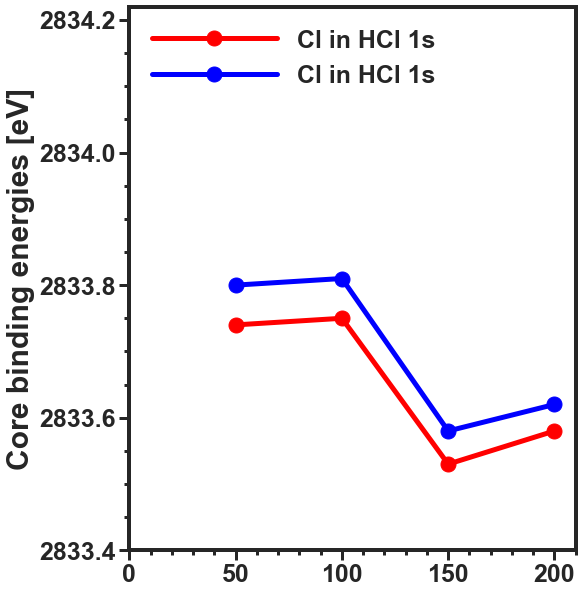

In [176]:

fig, ax = plt.subplots(figsize=(8,10))




plt.plot(noofwater, o_Hchloride_1s, 'r', noofwater, z_Hchloride_1s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl in HCl 1s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.ylabel('Core binding energies [eV]', fontsize=30, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 25}, handlelength=5)
plt.axis([ 0, 210, 2833.40, 2834.22])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(2833.40, 2834.22, 0.2))
plt.savefig('clusters_hcl_acv3z_x2cmmf_gaunt_1s.png', bbox_inches='tight', dpi=400)

plt.show()

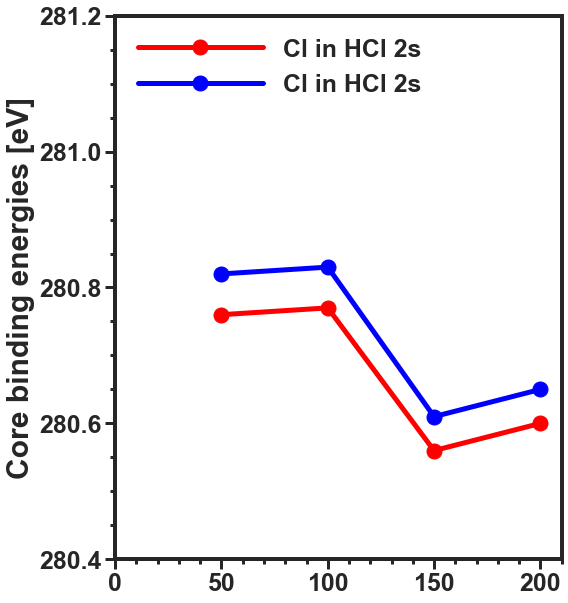

In [177]:
fig, ax = plt.subplots(figsize=(8,10))

plt.plot(noofwater, o_Hchloride_2s, 'r', noofwater, z_Hchloride_2s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl in HCl 2s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.ylabel('Core binding energies [eV]', fontsize=30, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 25}, handlelength=5)
plt.axis([ 0, 210, 280.5, 281.0])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(280.4, 281.3, 0.2))
plt.savefig('clusters_hcl_acv3z_x2cmmf_gaunt_2s.png', bbox_inches='tight', dpi=400)

plt.show()

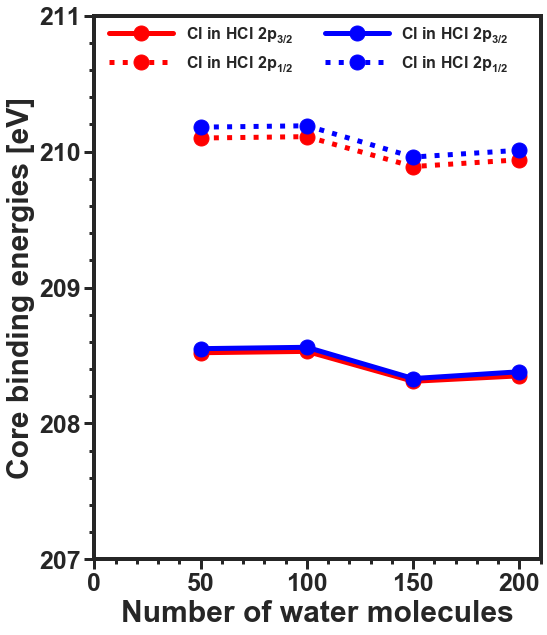

In [178]:
fig, ax = plt.subplots(figsize=(8,10))


plt.plot(noofwater, o_Hchloride_2p32, 'r',  marker='o', markersize=15, linestyle='solid', linewidth=5, label='Cl in HCl 2p$_{3/2}$')
plt.plot(noofwater, o_Hchloride_2p12, 'r',  marker='o', markersize=15, linestyle='dotted', linewidth=5, label='Cl in HCl 2p$_{1/2}$')


plt.plot(noofwater, z_Hchloride_2p32, 'b',  marker='o', markersize=15 , linestyle='solid', linewidth=5,label='Cl in HCl 2p$_{3/2}$')
plt.plot(noofwater, z_Hchloride_2p12, 'b',  marker='o', markersize=15 , linestyle='dotted', linewidth=5,label='Cl in HCl 2p$_{1/2}$')



ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.ylabel('Core binding energies [eV]', fontsize=30, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=30, fontweight='bold')
plt.legend(loc=2, prop={'size': 16}, handlelength=4, ncol=2, bbox_to_anchor=(0,1.01))
plt.axis([ 0, 210, 207.0, 211.0])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(207.0, 211.2, 1))
plt.savefig('clusters_hcl_acv3z_x2cmmf_gaunt_2p1232.png', bbox_inches='tight', dpi=400)

plt.show()

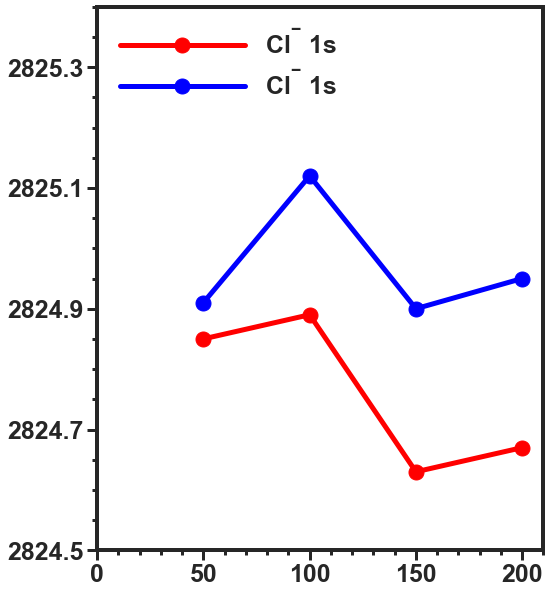

In [179]:
fig, ax = plt.subplots(figsize=(8,10))




plt.plot(noofwater, o_chloride_1s, 'r', noofwater, z_chloride_1s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl$^{-}$ 1s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
#plt.ylabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 25}, handlelength=5)
plt.axis([ 0, 210, 2824.5, 2825.4])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(2824.5, 2825.4, 0.2))
plt.savefig('clusters_cl_acv3z_x2cmmf_gaunt_1s.png', bbox_inches='tight', dpi=400)

plt.show()

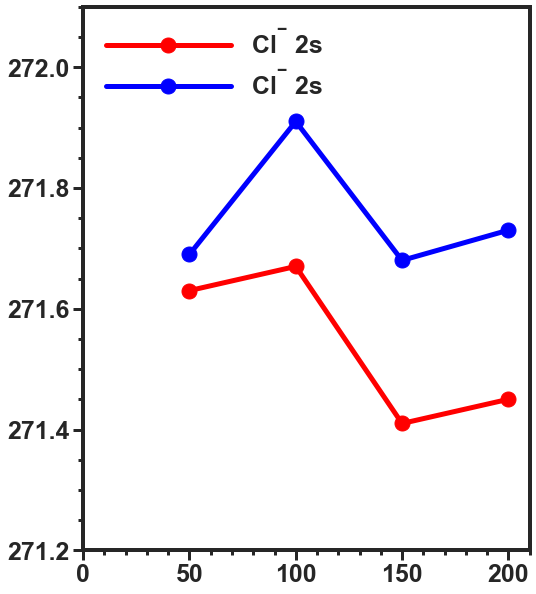

In [180]:
fig, ax = plt.subplots(figsize=(8,10))

plt.plot(noofwater, o_chloride_2s, 'r', noofwater, z_chloride_2s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl$^{-}$ 2s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
#plt.ylabel('Core binding energies [eV]', fontsize=30, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 25}, handlelength=5)
plt.axis([ 0, 210, 271.2, 272.1])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(271.2, 272.1, 0.2))
plt.savefig('clusters_cl_acv3z_x2cmmf_gaunt_2s.png', bbox_inches='tight', dpi=400)

plt.show()

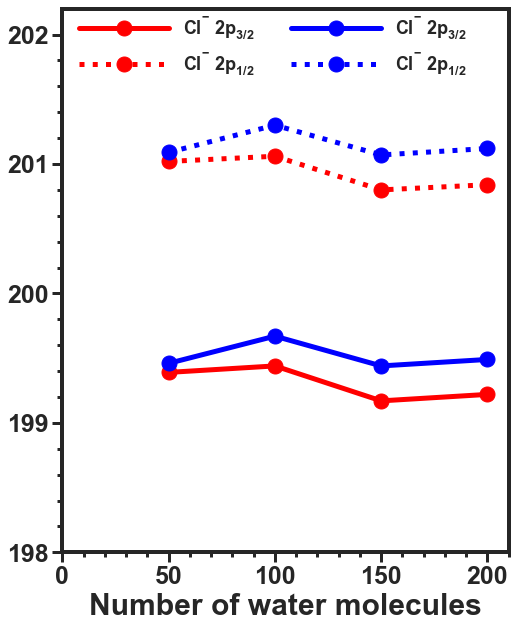

In [181]:
fig, ax = plt.subplots(figsize=(8,10))


plt.plot(noofwater, o_chloride_2p32, 'r',  marker='o', markersize=15, linestyle='solid', linewidth=5, label='Cl$^{-}$ 2p$_{3/2}$')
plt.plot(noofwater, o_chloride_2p12, 'r',  marker='o', markersize=15, linestyle='dotted', linewidth=5, label='Cl$^{-}$ 2p$_{1/2}$')


plt.plot(noofwater, z_chloride_2p32, 'b',  marker='o', markersize=15 , linestyle='solid', linewidth=5,label='Cl$^{-}$ 2p$_{3/2}$')
plt.plot(noofwater, z_chloride_2p12, 'b',  marker='o', markersize=15 , linestyle='dotted', linewidth=5,label='Cl$^{-}$ 2p$_{1/2}$')



ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
#plt.ylabel('Core binding energies [eV]', fontsize=30, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=30, fontweight='bold')
plt.legend(loc=2, prop={'size': 18}, handlelength=5, ncol=2, bbox_to_anchor=(0,1.02))
#plt.xticks(np.arange(0, 205, 50))
#plt.yticks(np.arange(198.25, 203.25, 1))

plt.axis([ 0, 210, 198, 202.2])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(198, 202.2, 1))
plt.savefig('clusters_cl_acv3z_x2cmmf_gaunt_2p1232.png', bbox_inches='tight', dpi=400)

plt.show()

([<matplotlib.axis.YTick at 0x7fd6367c7fd0>,
 <a list of 5 Text yticklabel objects>)

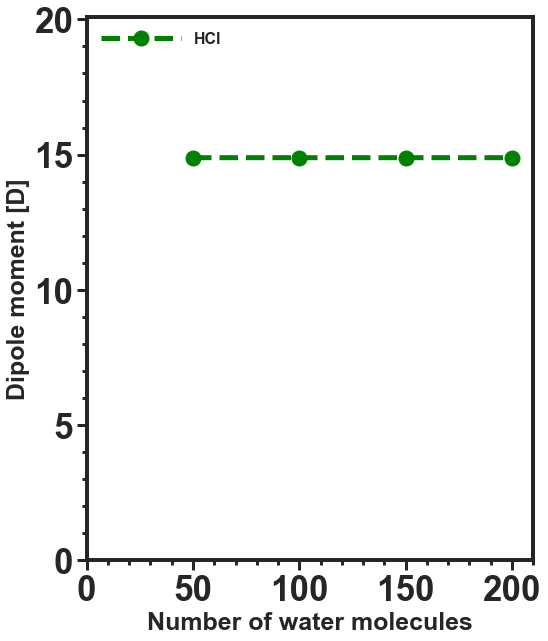

In [182]:
fig, ax = plt.subplots(figsize=(8,10))




plt.plot(noofwater, dipole_magnitude, 'green',  marker='o', markersize=15, linestyle='dashed', linewidth=5, label='HCl')


ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.ylabel('Dipole moment [D]', fontsize=25, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 16}, handlelength=5)
plt.axis([ 0, 210, 0, 20.1])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(0, 20.1, 5))
#plt.savefig('Dipole_magnitude.png', bbox_inches='tight', dpi=400)

#plt.show()

In [183]:
df = pd.read_excel('DIFFERENT_WATER_CLUSTER-SIZES_SAOP.xlsx', skiprows=7, sheet_name = 'HCl_Cl_longrange_h2om')
df.head()

,noofwater,z_Hchloride_1s,z_Hchloride_2s,z_Hchloride_2p,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,z_chloride_1s,z_chloride_2s,z_chloride_2p
0,50,2754.511,253.984,193.020,NaN,NaN,NaN,NaN,NaN,NaN,2745.257,244.763,183.826
1,100,2754.520,253.994,193.030,NaN,NaN,NaN,NaN,NaN,NaN,2745.399,244.906,183.969
2,150,2754.296,253.769,192.805,NaN,NaN,NaN,NaN,NaN,NaN,2745.271,244.777,183.840
3,200,2754.337,253.811,192.847,NaN,NaN,NaN,NaN,NaN,NaN,2745.207,244.713,183.780


In [184]:
noofwater = df.noofwater

z_Hchloride_1s = df.z_Hchloride_1s
z_Hchloride_1s = [round(num, 2) for num in z_Hchloride_1s]
z_Hchloride_2s = df.z_Hchloride_2s
z_Hchloride_2s = [round(num, 2) for num in z_Hchloride_2s]
z_Hchloride_2p = df.z_Hchloride_2p
z_Hchloride_2p = [round(num, 2) for num in z_Hchloride_2p]


z_chloride_1s = df.z_chloride_1s
z_chloride_1s = [round(num, 2) for num in z_chloride_1s]
z_chloride_2s = df.z_chloride_2s
z_chloride_2s = [round(num, 2) for num in z_chloride_2s]
z_chloride_2p = df.z_chloride_2p
z_chloride_2p = [round(num, 2) for num in z_chloride_2p]



In [185]:
df = pd.read_excel('DIFFERENT_WATER_CLUSTER-SIZES_SAOP.xlsx', skiprows=7, sheet_name = 'HClH2O1_ClH2O1_longrange_h2om')
df.head()

,noofwater,o_Hchloride_1s,o_Hchloride_2s,o_Hchloride_2p,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,o_chloride_1s,o_chloride_2s,o_chloride_2p
0,49,2754.44,253.95,192.990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2745.35,244.90,183.960
1,99,2754.45,253.96,193.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2745.33,244.87,183.934
2,149,2754.23,253.74,192.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2745.15,244.69,183.760
3,199,2754.28,253.78,192.822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2745.09,244.63,183.692


In [186]:
o_Hchloride_1s = df.o_Hchloride_1s
o_Hchloride_1s = [round(num, 2) for num in o_Hchloride_1s]
o_Hchloride_2s = df.o_Hchloride_2s
o_Hchloride_2s = [round(num, 2) for num in o_Hchloride_2s]
o_Hchloride_2p = df.o_Hchloride_2p
o_Hchloride_2p = [round(num, 2) for num in o_Hchloride_2p]



o_chloride_1s = df.o_chloride_1s
o_chloride_1s = [round(num, 2) for num in o_chloride_1s]
o_chloride_2s = df.o_chloride_2s
o_chloride_2s = [round(num, 2) for num in o_chloride_2s]
o_chloride_2p = df.o_chloride_2p
o_chloride_2p = [round(num, 2) for num in o_chloride_2p]



([<matplotlib.axis.YTick at 0x7fd638694f50>,
 <a list of 3 Text yticklabel objects>)

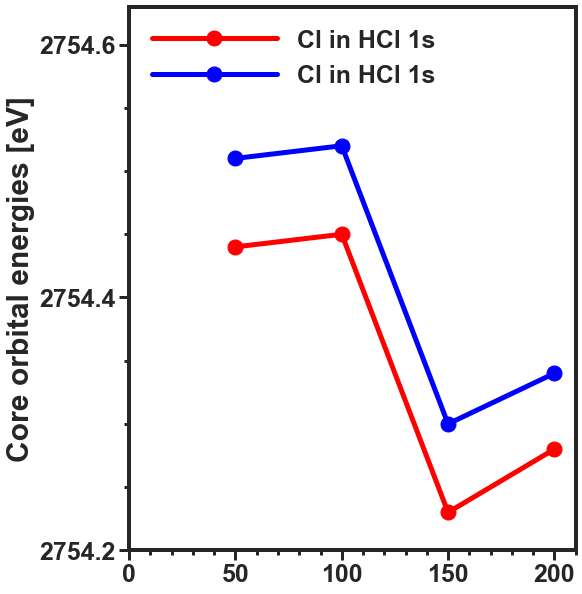

In [187]:

fig, ax = plt.subplots(figsize=(8,10))




plt.plot(noofwater, o_Hchloride_1s, 'r', noofwater, z_Hchloride_1s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl in HCl 1s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.ylabel('Core orbital energies [eV]', fontsize=30, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 25}, handlelength=5)
plt.axis([ 0, 210, 2754.20, 2754.63])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(2754.20, 2754.63, 0.2))
#plt.savefig('clusters_hcl_acv3z_x2cmmf_gaunt_1s_saop.png', bbox_inches='tight', dpi=400)

#plt.show()

([<matplotlib.axis.YTick at 0x7fd656e7b910>,
 <a list of 3 Text yticklabel objects>)

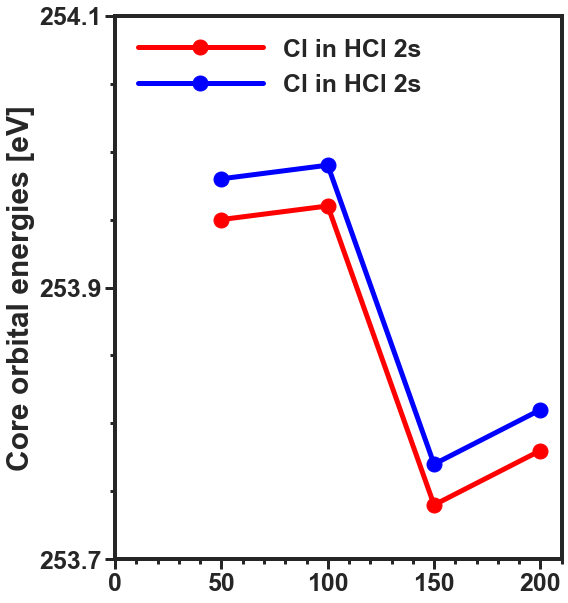

In [188]:
fig, ax = plt.subplots(figsize=(8,10))

plt.plot(noofwater, o_Hchloride_2s, 'r', noofwater, z_Hchloride_2s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl in HCl 2s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.ylabel('Core orbital energies [eV]', fontsize=30, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 25}, handlelength=5)
plt.axis([ 0, 210, 253.70, 254.10])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(253.70, 254.10, 0.2))
#plt.savefig('clusters_hcl_acv3z_x2cmmf_gaunt_2s_saop.png', bbox_inches='tight', dpi=400)

#plt.show()

([<matplotlib.axis.YTick at 0x7fd655e26dd0>,
 <a list of 3 Text yticklabel objects>)

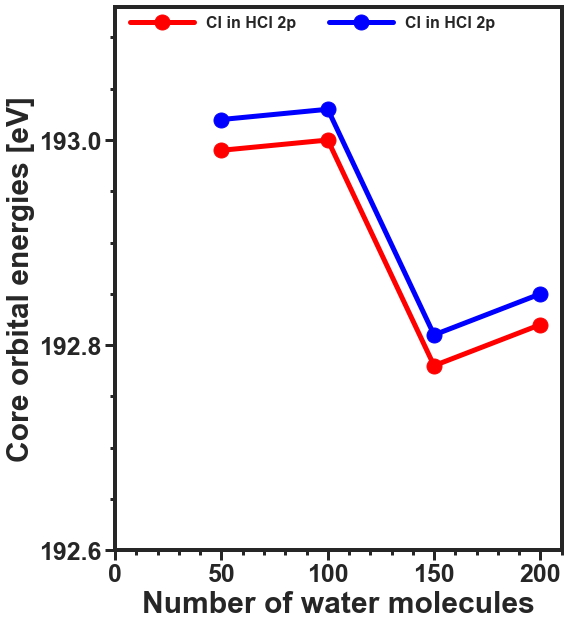

In [189]:
fig, ax = plt.subplots(figsize=(8,10))


#plt.plot(noofwater, o_Hchloride_2p32, 'r',  marker='o', markersize=15, linestyle='solid', linewidth=5, label='Cl in HCl 2p$_{3/2}$')
#plt.plot(noofwater, o_Hchloride_2p12, 'r',  marker='o', markersize=15, linestyle='dotted', linewidth=5, label='Cl in HCl 2p$_{1/2}$')

plt.plot(noofwater, o_Hchloride_2p, 'r',  marker='o', markersize=15, linestyle='solid', linewidth=5, label='Cl in HCl 2p')

#plt.plot(noofwater, z_Hchloride_2p32, 'b',  marker='o', markersize=15 , linestyle='solid', linewidth=5,label='Cl in HCl 2p$_{3/2}$')
#plt.plot(noofwater, z_Hchloride_2p12, 'b',  marker='o', markersize=15 , linestyle='dotted', linewidth=5,label='Cl in HCl 2p$_{1/2}$')

plt.plot(noofwater, z_Hchloride_2p, 'b',  marker='o', markersize=15 , linestyle='solid', linewidth=5,label='Cl in HCl 2p')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.ylabel('Core orbital energies [eV]', fontsize=30, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=30, fontweight='bold')
plt.legend(loc=2, prop={'size': 16}, handlelength=4, ncol=2, bbox_to_anchor=(0,1.01))
plt.axis([ 0, 210, 192.60, 193.13])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(192.60, 193.13, 0.2))
#plt.savefig('clusters_hcl_acv3z_x2cmmf_gaunt_2p1232_saop.png', bbox_inches='tight', dpi=400)

#plt.show()

([<matplotlib.axis.YTick at 0x7fd635ca2310>,
 <a list of 3 Text yticklabel objects>)

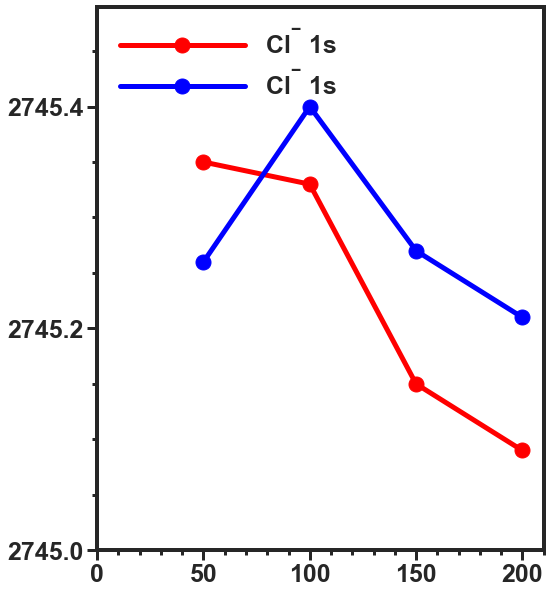

In [190]:
fig, ax = plt.subplots(figsize=(8,10))




plt.plot(noofwater, o_chloride_1s, 'r', noofwater, z_chloride_1s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl$^{-}$ 1s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
#plt.ylabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 25}, handlelength=5)
plt.axis([ 0, 210, 2745.0, 2745.49])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(2745.0, 2745.49, 0.2))
#plt.savefig('clusters_cl_acv3z_x2cmmf_gaunt_1s_saop.png', bbox_inches='tight', dpi=400)

#plt.show()

([<matplotlib.axis.YTick at 0x7fd636ad9290>,
 <a list of 3 Text yticklabel objects>)

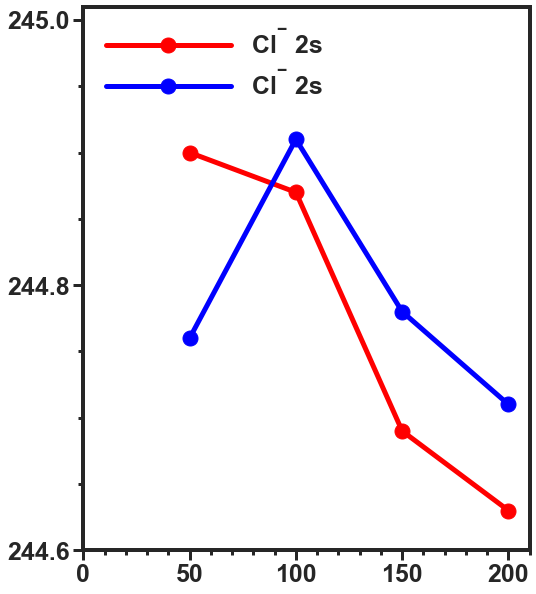

In [191]:
fig, ax = plt.subplots(figsize=(8,10))

plt.plot(noofwater, o_chloride_2s, 'r', noofwater, z_chloride_2s, 'b',  marker='o', markersize=15, linestyle='solid', linewidth=5,label='Cl$^{-}$ 2s')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
#plt.ylabel('Core binding energies [eV]', fontsize=30, fontweight='bold')
#plt.xlabel('Number of water molecules', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 25}, handlelength=5)
plt.axis([ 0, 210, 244.60, 245.01])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(244.60, 245.01, 0.2))
#plt.savefig('clusters_cl_acv3z_x2cmmf_gaunt_2s_saop.png', bbox_inches='tight', dpi=400)

#plt.show()

([<matplotlib.axis.YTick at 0x7fd656e5be50>,
 <a list of 3 Text yticklabel objects>)

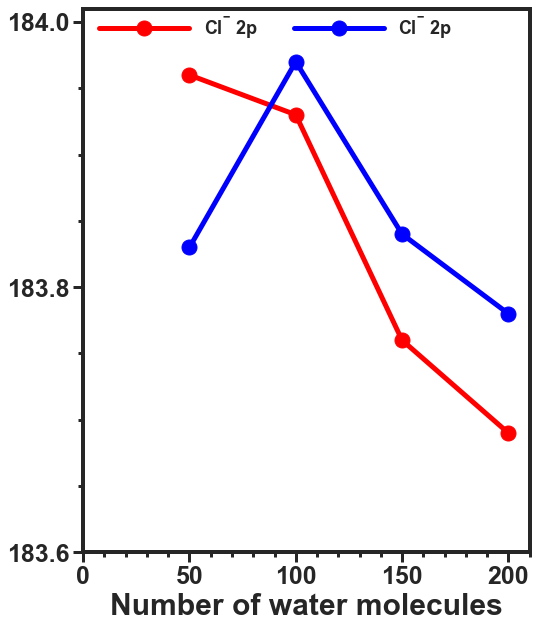

In [192]:
fig, ax = plt.subplots(figsize=(8,10))


#plt.plot(noofwater, o_chloride_2p32, 'r',  marker='o', markersize=15, linestyle='solid', linewidth=5, label='Cl$^{-}$ 2p$_{3/2}$')
#plt.plot(noofwater, o_chloride_2p12, 'r',  marker='o', markersize=15, linestyle='dotted', linewidth=5, label='Cl$^{-}$ 2p$_{1/2}$')

plt.plot(noofwater, o_chloride_2p, 'r',  marker='o', markersize=15, linestyle='solid', linewidth=5, label='Cl$^{-}$ 2p')

#plt.plot(noofwater, z_chloride_2p32, 'b',  marker='o', markersize=15 , linestyle='solid', linewidth=5,label='Cl$^{-}$ 2p$_{3/2}$')
#plt.plot(noofwater, z_chloride_2p12, 'b',  marker='o', markersize=15 , linestyle='dotted', linewidth=5,label='Cl$^{-}$ 2p$_{1/2}$')

plt.plot(noofwater, z_chloride_2p, 'b',  marker='o', markersize=15 , linestyle='solid', linewidth=5,label='Cl$^{-}$ 2p')


ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
#plt.ylabel('Core binding energies [eV]', fontsize=30, fontweight='bold')
plt.xlabel('Number of water molecules', fontsize=30, fontweight='bold')
plt.legend(loc=2, prop={'size': 18}, handlelength=5, ncol=2, bbox_to_anchor=(0,1.02))
plt.axis([ 0, 210, 183.60, 184.01])
plt.xticks(np.arange(0, 210, 50))
plt.yticks(np.arange(183.60, 184.01, 0.2))
#plt.savefig('clusters_cl_acv3z_x2cmmf_gaunt_2p1232_saop.png', bbox_inches='tight', dpi=400)

#plt.show()

In [193]:
df = pd.read_excel('cl_0_1_6_water_added_in_ice_saop.xlsx', skiprows=3)
df.head()

,cl_1s_saop_0water_in_active,cl_2s_saop_0water_in_active,cl_2p_saop_0water_in_active,cl_1s_saop_1water_in_active,cl_2s_saop_1water_in_active,cl_2p_saop_1water_in_active,cl_1s_saop_6water_in_active,cl_2s_saop_6water_in_active,cl_2p_saop_6water_in_active
0,2754.052521,243.511239,182.803498,2754.025310,243.484028,182.789893,2754.079732,243.538450,182.844314
1,2755.331438,244.790156,184.096021,2754.079732,244.817367,183.483773,2755.331438,244.762945,184.082415
2,2754.515108,243.946615,183.252479,2754.379053,244.001037,183.198058,2754.732796,244.164303,183.483773
3,2755.086539,244.518046,183.837516,2754.460686,244.681312,183.592617,2755.304227,244.762945,184.068809
4,2755.603548,245.035055,184.368131,2754.542319,244.980633,183.796699,2755.657970,245.116688,184.422552


mean_0water = 183.66608670000002
mean_1water = 183.696290916
mean_6water = 183.783094
std_0water = 0.4842640688417024
std_1water = 0.35116046159333864
std_6waters = 0.455294595113053


Text(0, 0.5, 'Normalized distribution')

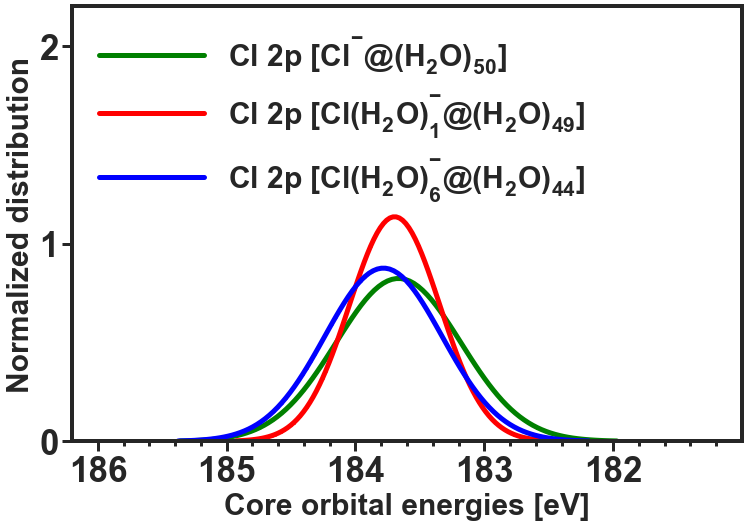

In [194]:
#Comparison between 0,1 and 6 water added to the activesystem and interacting with 50, 49, and 44 water molecules

cl_2p_saop_0water_in_active = df.cl_2p_saop_0water_in_active
cl_2p_saop_1water_in_active = df.cl_2p_saop_1water_in_active
cl_2p_saop_6water_in_active = df.cl_2p_saop_6water_in_active



zero_water_in_active_cl_2p = np.array(cl_2p_saop_0water_in_active)
one_water_in_active_cl_2p  = np.array(cl_2p_saop_1water_in_active)
six_water_in_active_cl_2p  = np.array(cl_2p_saop_6water_in_active)


mean_zero_water_in_active_cl_2p = np.mean(zero_water_in_active_cl_2p)
print("mean_0water =", mean_zero_water_in_active_cl_2p)
mean_one_water_in_active_cl_2p = np.mean(one_water_in_active_cl_2p)
print("mean_1water =", mean_one_water_in_active_cl_2p )
mean_six_water_in_active_cl_2p  = np.mean(six_water_in_active_cl_2p)
print("mean_6water =", mean_six_water_in_active_cl_2p )


std_zero_water_in_active_cl_2p = np.std(zero_water_in_active_cl_2p)
print("std_0water =", std_zero_water_in_active_cl_2p)
std_one_water_in_active_cl_2p  = np.std(one_water_in_active_cl_2p)
print("std_1water =", std_one_water_in_active_cl_2p)
std_six_water_in_active_cl_2p  = np.std(six_water_in_active_cl_2p )
print("std_6waters =", std_six_water_in_active_cl_2p)


zero_water_in_active_cl_2p_BE = np.linspace(mean_zero_water_in_active_cl_2p - 3.5*std_zero_water_in_active_cl_2p , mean_zero_water_in_active_cl_2p + 3.5*std_zero_water_in_active_cl_2p, 100)
one_water_in_active_cl_2p_BE = np.linspace(mean_one_water_in_active_cl_2p - 3.5*std_one_water_in_active_cl_2p, mean_one_water_in_active_cl_2p + 3.5*std_one_water_in_active_cl_2p, 100)
six_water_in_active_cl_2p_BE =  np.linspace(mean_six_water_in_active_cl_2p - 3.5*std_six_water_in_active_cl_2p, mean_six_water_in_active_cl_2p + 3.5*std_six_water_in_active_cl_2p, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)


plt.plot(zero_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(zero_water_in_active_cl_2p_BE, mean_zero_water_in_active_cl_2p, std_zero_water_in_active_cl_2p), color="green", marker='>', markersize=2, linestyle='solid',label='Cl 2p [Cl$^{-}$@(H$_{2}$O)$_{50}$]', linewidth=5)
plt.plot(one_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(one_water_in_active_cl_2p_BE, mean_one_water_in_active_cl_2p, std_one_water_in_active_cl_2p),  color="red", marker='x', markersize=2, linestyle='solid',label='Cl 2p [Cl(H$_{2}$O)$^{-}_{1}$@(H$_{2}$O)$_{49}$]', linewidth=5)
plt.plot(six_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(six_water_in_active_cl_2p_BE, mean_six_water_in_active_cl_2p, std_six_water_in_active_cl_2p), color="blue", marker='d', markersize=2, linestyle='solid',label='Cl 2p [Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)

plt.axis([181, 186.2, 0, 2.2])
plt.yticks(np.arange(0, 2.2, 1))
plt.xticks(np.arange(182, 186.2, 1))
plt.gca().invert_xaxis()

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=3.5)
plt.xlabel('Core orbital energies [eV]', fontsize=30, fontweight='bold')
#plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel('Normalized distribution', fontsize=30, fontweight='bold')

#plt.savefig('cl50_0_1_6_saop-2p.png', bbox_inches='tight', dpi=400)

#plt.show()
#plt.close()

In [195]:
#Rigid HCl

In [196]:
df = pd.read_excel('HCl_Cl-_adsorbed_on_ice_210K_data.xlsx', skiprows=7, sheet_name = 'HCl_Cl-_on_ice_X2cmmf+gaunt')
df.head()

,Unnamed: 0,z_Hchloride_1s,Unnamed: 2,Unnamed: 3,z_Hchloride_2s,Unnamed: 5,z_Hchloride_2p12,Unnamed: 7,Unnamed: 8,z_Hchloride_2p32,...,z_chloride_1s,Unnamed: 16,Unnamed: 17,z_chloride_2s,Unnamed: 19,z_chloride_2p12,Unnamed: 21,Unnamed: 22,z_chloride_2p32,z_chloride_2p
0,104.145056,2833.891122,2824.001122,10.318187,280.768175,7.721440,210.108113,7.663424,7.659405,208.474741,...,2829.247011,2819.881011,10.140970,275.945936,7.544894,205.304114,7.485096,7.485067,203.676553,204.490333
1,104.148317,2833.979862,2824.089862,10.321073,280.846705,7.724323,210.186560,7.665852,7.662947,208.555973,...,2828.841779,2819.475779,10.127521,275.579982,7.531355,204.935714,7.471656,7.471448,203.308394,204.122054
2,104.145398,2833.900411,2824.010411,10.320777,280.838662,7.723753,210.171048,7.665348,7.662300,208.540314,...,2829.167092,2819.801092,10.139618,275.909141,7.543436,205.264447,7.483518,7.483749,203.637153,204.450800
3,104.148559,2833.986441,2824.096441,10.320647,280.835132,7.723710,210.169863,7.665298,7.662254,208.539013,...,2824.586587,2815.220587,9.976992,271.483942,7.380296,200.825243,7.320276,7.420750,200.559028,200.692136
4,104.152555,2834.095186,2824.205186,10.320758,280.838158,7.723560,210.165787,7.665353,7.661800,208.533575,...,2829.137963,2819.771963,10.138144,275.869028,7.542000,205.225362,7.482046,7.482342,203.597982,204.411672


{2833.9: 9, 2834.0: 12, 2834.1: 1, 2834.3: 1, 2834.2: 1, 2833.8: 1}
mean_z = 2833.98
std_z = 0.10198039027182003


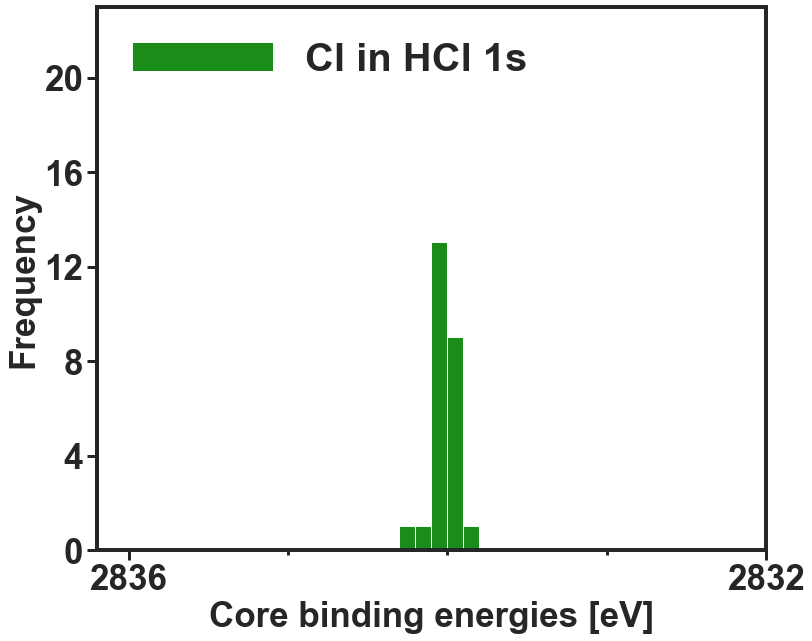

In [197]:
fig, ax = plt.subplots(figsize=(12,10))

x_hcl_acv3z_x2cmmf_gaunt_1s = df.z_Hchloride_1s

y_hcl_acv3z_x2cmmf_gaunt_1s = [round(num, 1) for num in x_hcl_acv3z_x2cmmf_gaunt_1s]

z_hcl_acv3z_x2cmmf_gaunt_1s = np.array(y_hcl_acv3z_x2cmmf_gaunt_1s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_1s = count(z_hcl_acv3z_x2cmmf_gaunt_1s)
print(counted_hcl_acv3z_x2cmmf_gaunt_1s)



mean_z_hcl_acv3z_x2cmmf_gaunt_1s = np.mean(z_hcl_acv3z_x2cmmf_gaunt_1s)
print("mean_z =", mean_z_hcl_acv3z_x2cmmf_gaunt_1s)


std_z_hcl_acv3z_x2cmmf_gaunt_1s = np.std(z_hcl_acv3z_x2cmmf_gaunt_1s)
print("std_z =", std_z_hcl_acv3z_x2cmmf_gaunt_1s)






kwargs = dict(alpha=0.9, bins=5)

dk_hcl_acv3z_x2cmmf_gaunt_1s = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_1s))
dv_hcl_acv3z_x2cmmf_gaunt_1s = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_1s))


dkmin_z_hcl_acv3z_x2cmmf_gaunt_1s = min(dk_hcl_acv3z_x2cmmf_gaunt_1s)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_1s = max(dk_hcl_acv3z_x2cmmf_gaunt_1s)



dvmin_z_hcl_acv3z_x2cmmf_gaunt_1s = min(dv_hcl_acv3z_x2cmmf_gaunt_1s)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_1s = max(dv_hcl_acv3z_x2cmmf_gaunt_1s)


ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 30, 2))
#plt.xticks(np.arange(2833.8, 2834.55, 0.08))

plt.axis([2832, 2836.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(2832, 2836.2, 4))
plt.gca().invert_xaxis()

plt.hist(z_hcl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='green', rwidth=0.95, label='Cl in HCl 1s', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_1s , color='green', hist=False, kde_kws = {'color':'green', 'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 40}, handlelength=3.5)
#plt.figtext(0.2, 0.7, "$\mu=2823.1, \sigma=0.1$", fontsize=40, color="green")
plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_1s.png', bbox_inches='tight', dpi=400)

plt.show()


{280.77: 1, 280.85: 4, 280.84: 5, 280.83: 3, 280.86: 3, 280.87: 5, 280.89: 1, 280.82: 1, 280.79: 1, 280.72: 1}
mean_z = 280.8404
std_z = 0.035268115912250625


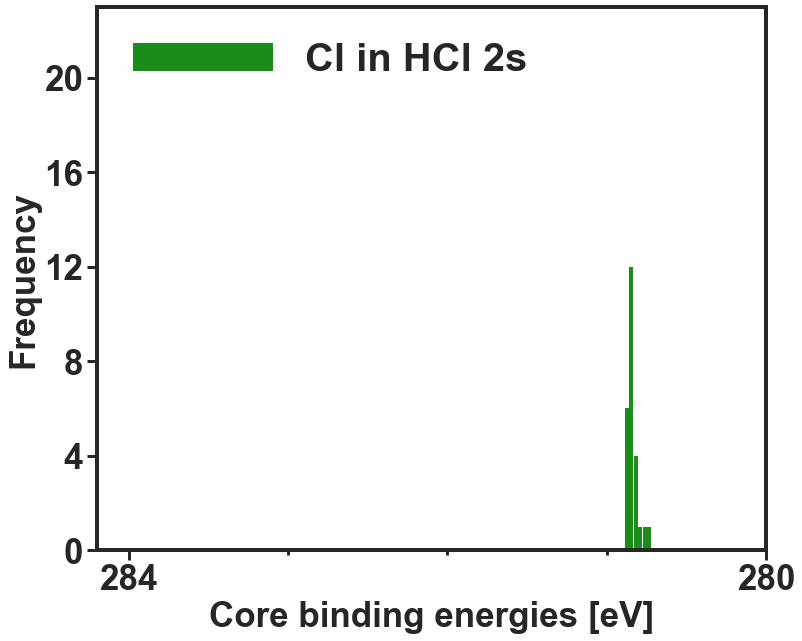

In [198]:
x_hcl_acv3z_x2cmmf_gaunt_2s = df.z_Hchloride_2s

y_hcl_acv3z_x2cmmf_gaunt_2s = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2s]

z_hcl_acv3z_x2cmmf_gaunt_2s = np.array(y_hcl_acv3z_x2cmmf_gaunt_2s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2s = count(z_hcl_acv3z_x2cmmf_gaunt_2s)
print(counted_hcl_acv3z_x2cmmf_gaunt_2s)



mean_z_hcl_acv3z_x2cmmf_gaunt_2s = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2s)
print("mean_z =", mean_z_hcl_acv3z_x2cmmf_gaunt_2s)


std_z_hcl_acv3z_x2cmmf_gaunt_2s = np.std(z_hcl_acv3z_x2cmmf_gaunt_2s)
print("std_z =", std_z_hcl_acv3z_x2cmmf_gaunt_2s)



plt.figure(figsize=(12,10))



kwargs = dict(alpha=0.9, bins=6)

dk_hcl_acv3z_x2cmmf_gaunt_2s = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2s))
dv_hcl_acv3z_x2cmmf_gaunt_2s = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2s))


dkmin_z_hcl_acv3z_x2cmmf_gaunt_2s = min(dk_hcl_acv3z_x2cmmf_gaunt_2s)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2s = max(dk_hcl_acv3z_x2cmmf_gaunt_2s)



dvmin_z_hcl_acv3z_x2cmmf_gaunt_2s = min(dv_hcl_acv3z_x2cmmf_gaunt_2s)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2s = max(dv_hcl_acv3z_x2cmmf_gaunt_2s)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 13, 2))
#plt.xticks(np.arange(280.00, 282.04, 0.08))

plt.axis([280, 284.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(280, 284.2, 4))
plt.gca().invert_xaxis()

plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='green', rwidth=0.94, label='Cl in HCl 2s', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2s , color='red', hist=False, kde_kws = {'color':'green', 'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 40}, handlelength=3.5)
#plt.figtext(0.2, 0.7, "$\mu=280.8, \sigma=0.04$", fontsize=40, color="green")
plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_2s.png', bbox_inches='tight', dpi=400)

plt.show()


{209.29: 1, 209.37: 3, 209.36: 2, 209.35: 6, 209.38: 3, 209.39: 7, 209.33: 1, 209.31: 1, 209.4: 1}
mean_z = 209.36520000000002
std_z = 0.026551082840438885


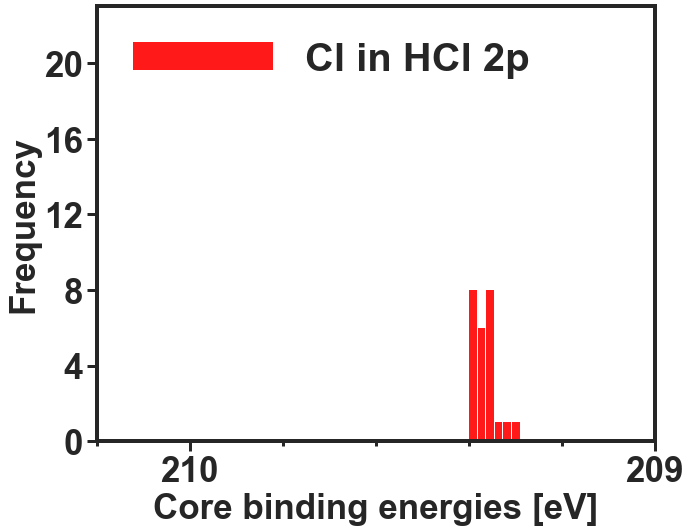

In [199]:
x_hcl_acv3z_x2cmmf_gaunt_2p = df.z_Hchloride_2p

y_hcl_acv3z_x2cmmf_gaunt_2p = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2p]

z_hcl_acv3z_x2cmmf_gaunt_2p = np.array(y_hcl_acv3z_x2cmmf_gaunt_2p)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2p = count(z_hcl_acv3z_x2cmmf_gaunt_2p)
print(counted_hcl_acv3z_x2cmmf_gaunt_2p)



mean_z_hcl_acv3z_x2cmmf_gaunt_2p = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2p)
print("mean_z =", mean_z_hcl_acv3z_x2cmmf_gaunt_2p)


std_z_hcl_acv3z_x2cmmf_gaunt_2p = np.std(z_hcl_acv3z_x2cmmf_gaunt_2p)
print("std_z =", std_z_hcl_acv3z_x2cmmf_gaunt_2p)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=6)

dk_hcl_acv3z_x2cmmf_gaunt_2p = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2p))
dv_hcl_acv3z_x2cmmf_gaunt_2p = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2p))


dkmin_z_hcl_acv3z_x2cmmf_gaunt_2p = min(dk_hcl_acv3z_x2cmmf_gaunt_2p)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2p = max(dk_hcl_acv3z_x2cmmf_gaunt_2p)



dvmin_z_hcl_acv3z_x2cmmf_gaunt_2p = min(dv_hcl_acv3z_x2cmmf_gaunt_2p)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2p = max(dv_hcl_acv3z_x2cmmf_gaunt_2p)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 30, 2))
#plt.xticks(np.arange(208.6, 209.6, 0.08))

plt.axis([209, 210.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(209, 210.2, 1))
plt.gca().invert_xaxis()

plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p, **kwargs, color='red', rwidth=0.92, label='Cl in HCl 2p', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2p , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 40}, handlelength=3.5)
#plt.figtext(0.2, 0.6, "$\mu=209.4, \sigma=0.03$", fontsize=40, color="red")
#plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_2p.png', bbox_inches='tight', dpi=400)

plt.show()


{208.47: 1, 208.56: 6, 208.54: 3, 208.53: 4, 208.57: 6, 208.58: 1, 208.51: 1, 208.5: 1, 208.59: 1, 208.55: 1}
mean = 208.54879999999997
std = 0.02673125511456639
{210.11: 1, 210.19: 6, 210.17: 5, 210.16: 2, 210.2: 6, 210.21: 1, 210.14: 1, 210.13: 1, 210.22: 1, 210.18: 1}
mean = 210.18
std = 0.02513961017995191


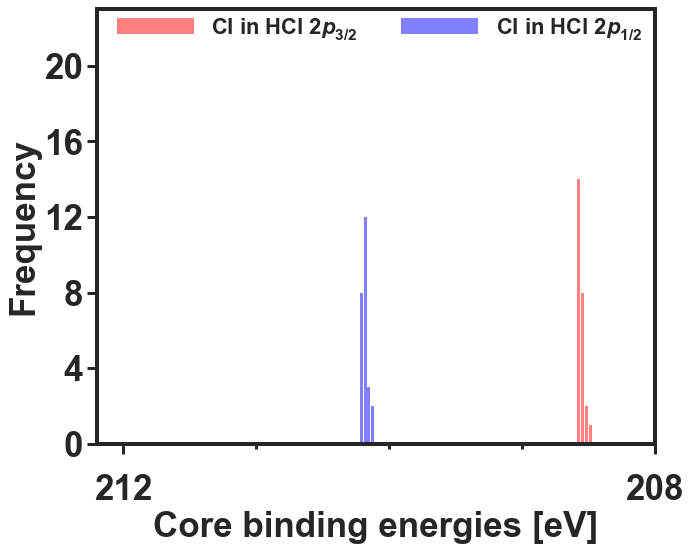

In [200]:
x_hcl_acv3z_x2cmmf_gaunt_2p32 = df.z_Hchloride_2p32
x_hcl_acv3z_x2cmmf_gaunt_2p12 = df.z_Hchloride_2p12

#spa_x_hcl_acv3z_x2cmmf_gaunt_2p12 = np.array(x_hcl_acv3z_x2cmmf_gaunt_2p12)


#x_hcl_acv3z_x2cmmf_gaunt_2p12 = [] 

#for i in spa_x_hcl_acv3z_x2cmmf_gaunt_2p12:
#    i-=1.44
#    x_hcl_acv3z_x2cmmf_gaunt_2p12.append(i)
#print("Adjust to plot spin-orbit graph=", x_hcl_acv3z_x2cmmf_gaunt_2p12)


y_hcl_acv3z_x2cmmf_gaunt_2p32 = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2p32]

z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.array(y_hcl_acv3z_x2cmmf_gaunt_2p32)



y_hcl_acv3z_x2cmmf_gaunt_2p12 = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2p12]

z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.array(y_hcl_acv3z_x2cmmf_gaunt_2p12)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2p32 = count(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print(counted_hcl_acv3z_x2cmmf_gaunt_2p32)

mean_z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print("mean =", mean_z_hcl_acv3z_x2cmmf_gaunt_2p32)


std_z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.std(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print("std =", std_z_hcl_acv3z_x2cmmf_gaunt_2p32)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2p12 = count(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print(counted_hcl_acv3z_x2cmmf_gaunt_2p12)


mean_z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print("mean =", mean_z_hcl_acv3z_x2cmmf_gaunt_2p12)


std_z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.std(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print("std =", std_z_hcl_acv3z_x2cmmf_gaunt_2p12)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.5, bins=4)

dk_hcl_acv3z_x2cmmf_gaunt_2p32 = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2p32))
dv_hcl_acv3z_x2cmmf_gaunt_2p32 = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2p32))


dk_hcl_acv3z_x2cmmf_gaunt_2p12 = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2p12))
dv_hcl_acv3z_x2cmmf_gaunt_2p12 = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2p12))



dkmin_z_hcl_acv3z_x2cmmf_gaunt_2p32 = min(dk_hcl_acv3z_x2cmmf_gaunt_2p32)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2p32 = max(dk_hcl_acv3z_x2cmmf_gaunt_2p32)
dvmin_z_hcl_acv3z_x2cmmf_gaunt_2p32 = min(dv_hcl_acv3z_x2cmmf_gaunt_2p32)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2p32 = max(dv_hcl_acv3z_x2cmmf_gaunt_2p32)

dkmin_z_hcl_acv3z_x2cmmf_gaunt_2p12 = min(dk_hcl_acv3z_x2cmmf_gaunt_2p12)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2p12 = max(dk_hcl_acv3z_x2cmmf_gaunt_2p12)
dvmin_z_hcl_acv3z_x2cmmf_gaunt_2p12 = min(dv_hcl_acv3z_x2cmmf_gaunt_2p12)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2p12 = max(dv_hcl_acv3z_x2cmmf_gaunt_2p12)




plt.minorticks_on()
plt.tick_params(axis='y', which='major', length=10, width=3)
plt.tick_params(axis='x', which='major', length=10, width=3, pad=20)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([208, 212.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(208, 212.2, 4))
plt.gca().invert_xaxis()


plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='red', rwidth=0.88, label='Cl in HCl 2$p_{3/2}$', linewidth=0.2)
plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='blue', rwidth=0.82, label='Cl in HCl 2$p_{1/2}$', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2p32 , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':2, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2p12, color='blue', hist=False, kde_kws = {'color':'blue', 
#                      'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 22}, handlelength=3.5, ncol=2, bbox_to_anchor=(0,1.03))
#plt.figtext(0.2, 0.65, "$\mu=208.6, \sigma=0.04$", fontsize=25, color="red")
#plt.figtext(0.2, 0.6, "$\mu=210.2, \sigma=0.03$", fontsize=25, color="blue")
plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_2p1232.png', bbox_inches='tight', dpi=400)
#plt.gca().axes.xaxis.set_ticklabels([])


plt.show()



In [201]:
##Cl- adsorbed on ice, zero water molecule added to the Cl

{2829.2: 2, 2828.8: 1, 2824.6: 1, 2829.1: 2, 2827.7: 1, 2832.6: 1, 2822.7: 1, 2828.6: 2, 2828.0: 1, 2826.4: 1, 2827.9: 1, 2828.4: 1, 2838.9: 1, 2823.4: 1, 2824.9: 1, 2826.8: 1, 2827.0: 2, 2829.5: 1, 2827.8: 1, 2828.9: 1, 2829.0: 1}
mean_z = 2828.164
std_z = 3.0115617211008687


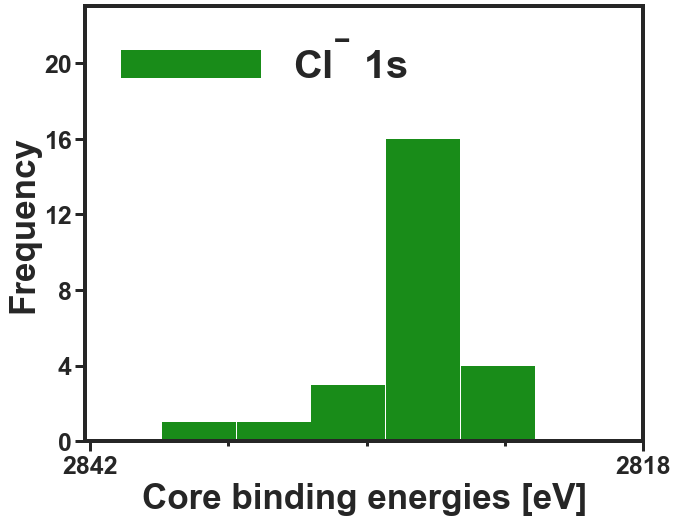

In [202]:
x_cl_acv3z_x2cmmf_gaunt_1s = df.z_chloride_1s
y_cl_acv3z_x2cmmf_gaunt_1s = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_1s]

z_cl_acv3z_x2cmmf_gaunt_1s = np.array(y_cl_acv3z_x2cmmf_gaunt_1s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_1s = count(z_cl_acv3z_x2cmmf_gaunt_1s)
print(counted_cl_acv3z_x2cmmf_gaunt_1s)



mean_z_cl_acv3z_x2cmmf_gaunt_1s = np.mean(z_cl_acv3z_x2cmmf_gaunt_1s)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_1s)


std_z_cl_acv3z_x2cmmf_gaunt_1s = np.std(z_cl_acv3z_x2cmmf_gaunt_1s)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_1s)



plt.figure(figsize=(10,8))



kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_1s = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_1s))
dv_cl_acv3z_x2cmmf_gaunt_1s = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_1s))


dkmin_z_cl_acv3z_x2cmmf_gaunt_1s = min(dk_cl_acv3z_x2cmmf_gaunt_1s)
dkmax_z_cl_acv3z_x2cmmf_gaunt_1s = max(dk_cl_acv3z_x2cmmf_gaunt_1s)



dvmin_z_cl_acv3z_x2cmmf_gaunt_1s = min(dv_cl_acv3z_x2cmmf_gaunt_1s)
dvmax_z_cl_acv3z_x2cmmf_gaunt_1s = max(dv_cl_acv3z_x2cmmf_gaunt_1s)





plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 20.2, 2))
#plt.xticks(np.arange(2822, 2842.2, 4))

plt.axis([2818, 2842.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(2818, 2842.2, 24))
plt.gca().invert_xaxis()

plt.hist(z_cl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='green', rwidth=0.99, label='Cl$^{-}$ 1s', linewidth=0.1)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_1s , color='red', hist=False, kde_kws = {'color':'green', 'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 40}, handlelength=3.5)
#plt.figtext(0.15, 0.6, "$\mu=2818.3, \sigma=3.0$", fontsize=30, color="green")
plt.savefig('zero_cl_acv3z_x2cmmf_gaunt_1s.png', bbox_inches='tight', dpi=400)

plt.show()


{275.9: 3, 275.6: 2, 271.5: 1, 274.4: 1, 274.1: 2, 273.9: 1, 275.3: 1, 274.7: 1, 274.0: 1, 274.6: 1, 275.5: 2, 275.0: 1, 273.4: 1, 273.7: 2, 275.8: 1, 277.4: 1, 274.5: 1, 275.4: 1, 275.7: 1}
mean_z = 274.844
std_z = 1.149984347719566


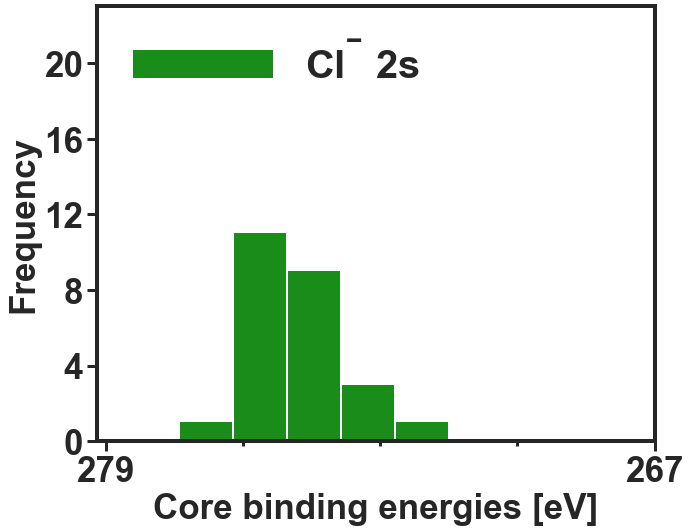

In [203]:
x_cl_acv3z_x2cmmf_gaunt_2s = df.z_chloride_2s

y_cl_acv3z_x2cmmf_gaunt_2s = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2s]

z_cl_acv3z_x2cmmf_gaunt_2s = np.array(y_cl_acv3z_x2cmmf_gaunt_2s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2s = count(z_cl_acv3z_x2cmmf_gaunt_2s)
print(counted_cl_acv3z_x2cmmf_gaunt_2s)



mean_z_cl_acv3z_x2cmmf_gaunt_2s = np.mean(z_cl_acv3z_x2cmmf_gaunt_2s)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_2s)


std_z_cl_acv3z_x2cmmf_gaunt_2s = np.std(z_cl_acv3z_x2cmmf_gaunt_2s)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_2s)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_2s = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2s))
dv_cl_acv3z_x2cmmf_gaunt_2s = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2s))


dkmin_z_cl_acv3z_x2cmmf_gaunt_2s = min(dk_cl_acv3z_x2cmmf_gaunt_2s)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2s = max(dk_cl_acv3z_x2cmmf_gaunt_2s)



dvmin_z_cl_acv3z_x2cmmf_gaunt_2s = min(dv_cl_acv3z_x2cmmf_gaunt_2s)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2s = max(dv_cl_acv3z_x2cmmf_gaunt_2s)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)

plt.axis([267, 279.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(267, 279.2, 12))
plt.gca().invert_xaxis()


plt.hist(z_cl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='green', rwidth=0.96, label='Cl$^{-}$ 2s', linewidth=0.1)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2s , color='red', hist=False, kde_kws = {'color':'green', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 40}, handlelength=3.5)
#plt.figtext(0.2, 0.6, "$\mu=274.8, \sigma=1.1$", fontsize=30, color="green")
plt.savefig('zero_cl_acv3z_x2cmmf_gaunt_2s.png', bbox_inches='tight', dpi=400)

plt.show()


{204.5: 2, 204.1: 1, 200.7: 1, 204.4: 2, 202.9: 1, 203.6: 1, 202.7: 2, 203.9: 2, 203.2: 2, 203.1: 2, 204.0: 1, 202.2: 3, 203.0: 1, 202.1: 1, 205.4: 1, 204.2: 1, 204.3: 1}
mean_z = 203.38
std_z = 1.0237187113655828


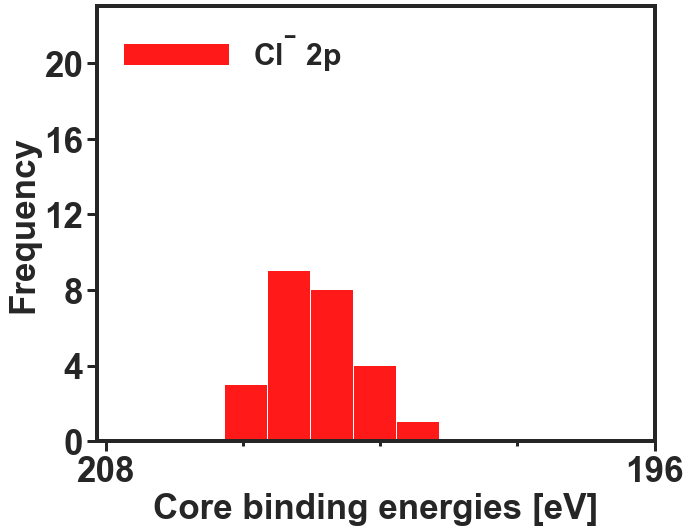

In [204]:
x_cl_acv3z_x2cmmf_gaunt_2p = df.z_chloride_2p

y_cl_acv3z_x2cmmf_gaunt_2p = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2p]

z_cl_acv3z_x2cmmf_gaunt_2p = np.array(y_cl_acv3z_x2cmmf_gaunt_2p)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p = count(z_cl_acv3z_x2cmmf_gaunt_2p)
print(counted_cl_acv3z_x2cmmf_gaunt_2p)



mean_z_cl_acv3z_x2cmmf_gaunt_2p = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_2p)


std_z_cl_acv3z_x2cmmf_gaunt_2p = np.std(z_cl_acv3z_x2cmmf_gaunt_2p)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_2p)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_2p = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p))
dv_cl_acv3z_x2cmmf_gaunt_2p = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p))


dkmin_z_cl_acv3z_x2cmmf_gaunt_2p = min(dk_cl_acv3z_x2cmmf_gaunt_2p)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p = max(dk_cl_acv3z_x2cmmf_gaunt_2p)



dvmin_z_cl_acv3z_x2cmmf_gaunt_2p = min(dv_cl_acv3z_x2cmmf_gaunt_2p)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p = max(dv_cl_acv3z_x2cmmf_gaunt_2p)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([196, 208.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(196, 208.2, 12))
plt.gca().invert_xaxis()

plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p, **kwargs, color='red', rwidth=0.97, label='Cl$^{-}$ 2p', linewidth=0.1)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p , color='red', hist=False, kde_kws = {'color':'red', 
#                      'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=3.5)
#plt.figtext(0.2, 0.6, "$\mu=203.3, \sigma=1.1$", fontsize=30, color="red")
#plt.savefig('zero_cl_acv3z_x2cmmf_gaunt_2p.png', bbox_inches='tight', dpi=400)

plt.show()


{203.677: 1, 203.308: 1, 203.637: 1, 200.559: 1, 203.598: 1, 202.135: 1, 201.949: 1, 201.558: 1, 203.059: 1, 202.415: 1, 201.854: 1, 202.282: 1, 203.119: 1, 201.86: 1, 202.336: 1, 201.92: 1, 201.263: 1, 201.431: 1, 203.568: 1, 204.399: 1, 202.24: 1, 201.39: 1, 203.377: 1, 203.115: 1, 203.45: 1}
mean = 202.53996000000004
std = 0.9444200116473603
{205.3: 3, 204.9: 1, 200.8: 1, 205.2: 2, 203.8: 2, 204.7: 2, 204.0: 2, 203.5: 1, 203.9: 2, 204.8: 1, 202.6: 1, 204.1: 1, 202.9: 1, 203.1: 1, 206.4: 1, 203.0: 1, 205.0: 1, 205.1: 1}
mean = 204.21200000000002
std = 1.1455374284587991


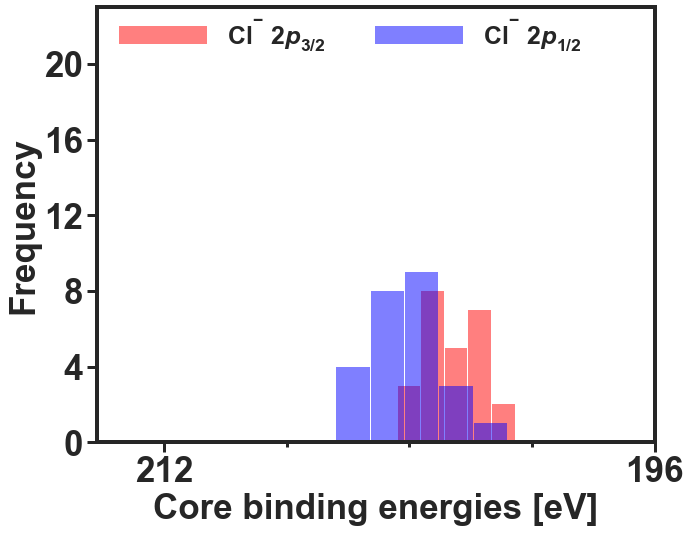

In [205]:
x_cl_acv3z_x2cmmf_gaunt_2p32 = df.z_chloride_2p32
x_cl_acv3z_x2cmmf_gaunt_2p12 = df.z_chloride_2p12



y_cl_acv3z_x2cmmf_gaunt_2p32 = [round(num, 3) for num in x_cl_acv3z_x2cmmf_gaunt_2p32]

z_cl_acv3z_x2cmmf_gaunt_2p32 = np.array(y_cl_acv3z_x2cmmf_gaunt_2p32)



y_cl_acv3z_x2cmmf_gaunt_2p12 = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2p12]

z_cl_acv3z_x2cmmf_gaunt_2p12 = np.array(y_cl_acv3z_x2cmmf_gaunt_2p12)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p32 = count(z_cl_acv3z_x2cmmf_gaunt_2p32)
print(counted_cl_acv3z_x2cmmf_gaunt_2p32)

mean_z_cl_acv3z_x2cmmf_gaunt_2p32 = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p32)
print("mean =", mean_z_cl_acv3z_x2cmmf_gaunt_2p32)


std_z_cl_acv3z_x2cmmf_gaunt_2p32 = np.std(z_cl_acv3z_x2cmmf_gaunt_2p32)
print("std =", std_z_cl_acv3z_x2cmmf_gaunt_2p32)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p12 = count(z_cl_acv3z_x2cmmf_gaunt_2p12)
print(counted_cl_acv3z_x2cmmf_gaunt_2p12)


mean_z_cl_acv3z_x2cmmf_gaunt_2p12 = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p12)
print("mean =", mean_z_cl_acv3z_x2cmmf_gaunt_2p12)


std_z_cl_acv3z_x2cmmf_gaunt_2p12 = np.std(z_cl_acv3z_x2cmmf_gaunt_2p12)
print("std =", std_z_cl_acv3z_x2cmmf_gaunt_2p12)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.5, bins=5, linewidth=0.2)

dk_cl_acv3z_x2cmmf_gaunt_2p32 = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p32))
dv_cl_acv3z_x2cmmf_gaunt_2p32 = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p32))


dk_cl_acv3z_x2cmmf_gaunt_2p12 = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p12))
dv_cl_acv3z_x2cmmf_gaunt_2p12 = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p12))



dkmin_z_cl_acv3z_x2cmmf_gaunt_2p32 = min(dk_cl_acv3z_x2cmmf_gaunt_2p32)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p32 = max(dk_cl_acv3z_x2cmmf_gaunt_2p32)
dvmin_z_cl_acv3z_x2cmmf_gaunt_2p32 = min(dv_cl_acv3z_x2cmmf_gaunt_2p32)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p32 = max(dv_cl_acv3z_x2cmmf_gaunt_2p32)

dkmin_z_cl_acv3z_x2cmmf_gaunt_2p12 = min(dk_cl_acv3z_x2cmmf_gaunt_2p12)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p12 = max(dk_cl_acv3z_x2cmmf_gaunt_2p12)
dvmin_z_cl_acv3z_x2cmmf_gaunt_2p12 = min(dv_cl_acv3z_x2cmmf_gaunt_2p12)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p12 = max(dv_cl_acv3z_x2cmmf_gaunt_2p12)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([196, 214.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(196, 214.2, 16))
plt.gca().invert_xaxis()


plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='red', rwidth=0.97, label='Cl$^{-}$ 2$p_{3/2}$')
plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='blue', rwidth=0.97, label='Cl$^{-}$ 2$p_{1/2}$')
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p32 , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p12, color='blue', hist=False, kde_kws = {'color':'blue', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 25}, handlelength=3.5, ncol=2, bbox_to_anchor=(0,1.03))
#plt.figtext(0.2, 0.6, "$\mu=202.4, \sigma=1.2$", fontsize=30, color="red")
#plt.figtext(0.2, 0.65, "$\mu=204.2, \sigma=1.1$", fontsize=30, color="blue")
plt.savefig('zero_cl_acv3z_x2cmmf_gaunt_2p1232.png', bbox_inches='tight', dpi=400)

plt.show()



In [206]:
#opt HCl

In [207]:
df = pd.read_excel('HCl_Cl-_adsorbed_on_ice_210K_data.xlsx', skiprows=7, sheet_name = 'opt_hcl')
df.head()

,Unnamed: 0,z_Hchloride_1s_opt,Unnamed: 2,Unnamed: 3,z_Hchloride_2s_opt,Unnamed: 5,z_Hchloride_2p12_opt,Unnamed: 7,Unnamed: 8,z_Hchloride_2p32_opt,z_Hchloride_2p_opt
0,104.106497,2832.841889,2822.951889,10.276894,279.644574,7.679969,208.979645,7.618760,7.621380,207.349733,208.164689
1,104.120396,2833.220096,2823.330096,10.290280,280.008800,7.693412,209.345427,7.632280,7.634762,207.715743,208.530585
2,104.100669,2832.683298,2822.793298,10.270562,279.472273,7.673742,208.810184,7.612668,7.615051,207.180735,207.995459
3,104.130509,2833.495274,2823.605274,10.300448,280.285484,7.703569,209.621808,7.642458,7.644905,207.992217,208.807013
4,104.140063,2833.755253,2823.865253,10.310552,280.560424,7.713599,209.894747,7.652367,7.655028,208.264761,209.079754


{2832.8: 2, 2833.2: 2, 2832.7: 1, 2833.5: 5, 2833.8: 2, 2832.9: 1, 2833.7: 1, 2832.6: 2, 2834.9: 1, 2833.4: 1, 2832.5: 1, 2833.0: 2, 2834.3: 1, 2833.6: 1, 2833.3: 1, 2834.2: 1}
mean_z = 2833.3520000000003
std_z = 0.5692942999890513


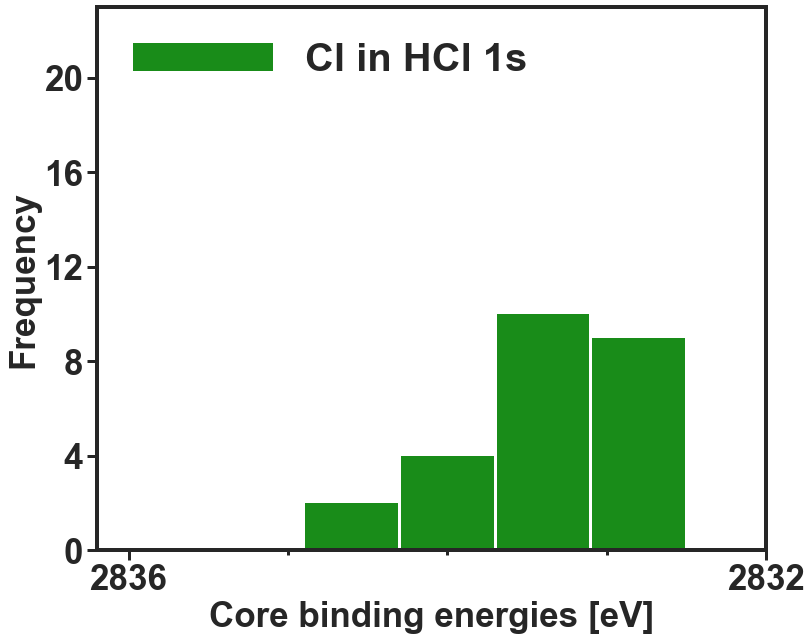

In [208]:
fig, ax = plt.subplots(figsize=(12,10))

x_hcl_acv3z_x2cmmf_gaunt_1s = df.z_Hchloride_1s_opt

y_hcl_acv3z_x2cmmf_gaunt_1s = [round(num, 1) for num in x_hcl_acv3z_x2cmmf_gaunt_1s]

z_hcl_acv3z_x2cmmf_gaunt_1s = np.array(y_hcl_acv3z_x2cmmf_gaunt_1s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_1s = count(z_hcl_acv3z_x2cmmf_gaunt_1s)
print(counted_hcl_acv3z_x2cmmf_gaunt_1s)



mean_z_hcl_acv3z_x2cmmf_gaunt_1s = np.mean(z_hcl_acv3z_x2cmmf_gaunt_1s)
print("mean_z =", mean_z_hcl_acv3z_x2cmmf_gaunt_1s)


std_z_hcl_acv3z_x2cmmf_gaunt_1s = np.std(z_hcl_acv3z_x2cmmf_gaunt_1s)
print("std_z =", std_z_hcl_acv3z_x2cmmf_gaunt_1s)






kwargs = dict(alpha=0.9, bins=4)

dk_hcl_acv3z_x2cmmf_gaunt_1s = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_1s))
dv_hcl_acv3z_x2cmmf_gaunt_1s = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_1s))


dkmin_z_hcl_acv3z_x2cmmf_gaunt_1s = min(dk_hcl_acv3z_x2cmmf_gaunt_1s)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_1s = max(dk_hcl_acv3z_x2cmmf_gaunt_1s)



dvmin_z_hcl_acv3z_x2cmmf_gaunt_1s = min(dv_hcl_acv3z_x2cmmf_gaunt_1s)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_1s = max(dv_hcl_acv3z_x2cmmf_gaunt_1s)


ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 30, 2))
#plt.xticks(np.arange(2833.8, 2834.55, 0.08))

plt.axis([2832, 2836.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(2832, 2836.2, 4))
plt.gca().invert_xaxis()

plt.hist(z_hcl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='green', rwidth=0.97, label='Cl in HCl 1s', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_1s , color='green', hist=False, kde_kws = {'color':'green', 'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 40}, handlelength=3.5)
#plt.figtext(0.2, 0.7, "$\mu=2823.1, \sigma=0.1$", fontsize=40, color="green")
plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_1s_opt.png', bbox_inches='tight', dpi=400)

plt.show()

{279.64: 1, 280.01: 1, 279.47: 1, 280.29: 3, 280.56: 1, 279.66: 1, 280.26: 1, 280.54: 1, 279.43: 1, 279.56: 1, 279.35: 1, 280.31: 1, 281.72: 1, 280.23: 1, 279.32: 1, 279.98: 1, 279.8: 2, 281.12: 1, 280.36: 1, 280.08: 1, 280.62: 1, 281.02: 1}
mean_z = 280.1484
std_z = 0.5764420525950552


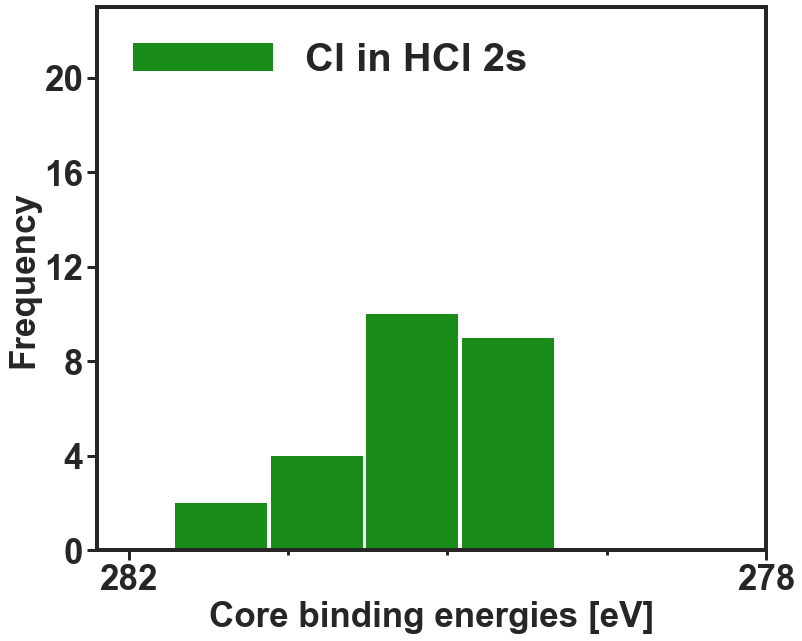

In [209]:
x_hcl_acv3z_x2cmmf_gaunt_2s = df.z_Hchloride_2s_opt

y_hcl_acv3z_x2cmmf_gaunt_2s = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2s]

z_hcl_acv3z_x2cmmf_gaunt_2s = np.array(y_hcl_acv3z_x2cmmf_gaunt_2s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2s = count(z_hcl_acv3z_x2cmmf_gaunt_2s)
print(counted_hcl_acv3z_x2cmmf_gaunt_2s)



mean_z_hcl_acv3z_x2cmmf_gaunt_2s = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2s)
print("mean_z =", mean_z_hcl_acv3z_x2cmmf_gaunt_2s)


std_z_hcl_acv3z_x2cmmf_gaunt_2s = np.std(z_hcl_acv3z_x2cmmf_gaunt_2s)
print("std_z =", std_z_hcl_acv3z_x2cmmf_gaunt_2s)



plt.figure(figsize=(12,10))



kwargs = dict(alpha=0.9, bins=4)

dk_hcl_acv3z_x2cmmf_gaunt_2s = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2s))
dv_hcl_acv3z_x2cmmf_gaunt_2s = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2s))


dkmin_z_hcl_acv3z_x2cmmf_gaunt_2s = min(dk_hcl_acv3z_x2cmmf_gaunt_2s)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2s = max(dk_hcl_acv3z_x2cmmf_gaunt_2s)



dvmin_z_hcl_acv3z_x2cmmf_gaunt_2s = min(dv_hcl_acv3z_x2cmmf_gaunt_2s)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2s = max(dv_hcl_acv3z_x2cmmf_gaunt_2s)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 13, 2))
#plt.xticks(np.arange(280.00, 282.04, 0.08))

plt.axis([278, 282.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(278, 282.2, 4))
plt.gca().invert_xaxis()

plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='green', rwidth=0.96, label='Cl in HCl 2s', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2s , color='red', hist=False, kde_kws = {'color':'green', 'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 40}, handlelength=3.5)
#plt.figtext(0.2, 0.7, "$\mu=280.8, \sigma=0.04$", fontsize=40, color="green")
plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_2s_opt.png', bbox_inches='tight', dpi=400)

plt.show()


{207.35: 1, 207.72: 1, 207.18: 1, 207.99: 1, 208.26: 1, 207.36: 1, 207.96: 1, 208.24: 1, 207.14: 1, 208.0: 2, 207.27: 1, 207.06: 1, 208.02: 1, 209.42: 1, 207.94: 1, 207.03: 1, 207.69: 1, 207.5: 2, 208.82: 1, 208.07: 1, 207.79: 1, 208.32: 1, 208.72: 1}
mean = 207.854
std = 0.5738501546571171
{208.98: 1, 209.35: 1, 208.81: 1, 209.62: 1, 209.89: 1, 208.99: 1, 209.59: 1, 209.87: 1, 208.77: 1, 209.63: 2, 208.9: 1, 208.69: 1, 209.65: 1, 211.05: 1, 209.57: 1, 208.66: 1, 209.32: 1, 209.13: 2, 210.45: 1, 209.7: 1, 209.41: 1, 209.95: 1, 210.35: 1}
mean = 209.4836
std = 0.5738981094236146


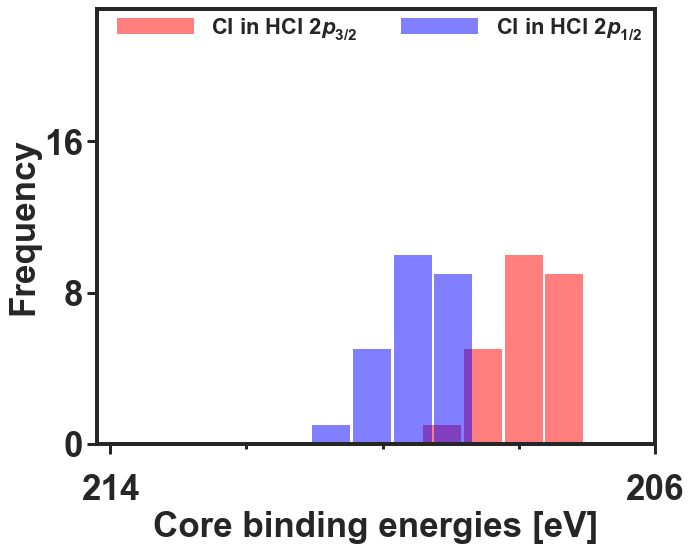

In [210]:
x_hcl_acv3z_x2cmmf_gaunt_2p32 = df.z_Hchloride_2p32_opt
x_hcl_acv3z_x2cmmf_gaunt_2p12 = df.z_Hchloride_2p12_opt

#spa_x_hcl_acv3z_x2cmmf_gaunt_2p12 = np.array(x_hcl_acv3z_x2cmmf_gaunt_2p12)


#x_hcl_acv3z_x2cmmf_gaunt_2p12 = [] 

#for i in spa_x_hcl_acv3z_x2cmmf_gaunt_2p12:
#    i-=1.44
#    x_hcl_acv3z_x2cmmf_gaunt_2p12.append(i)
#print("Adjust to plot spin-orbit graph=", x_hcl_acv3z_x2cmmf_gaunt_2p12)


y_hcl_acv3z_x2cmmf_gaunt_2p32 = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2p32]

z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.array(y_hcl_acv3z_x2cmmf_gaunt_2p32)



y_hcl_acv3z_x2cmmf_gaunt_2p12 = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2p12]

z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.array(y_hcl_acv3z_x2cmmf_gaunt_2p12)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2p32 = count(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print(counted_hcl_acv3z_x2cmmf_gaunt_2p32)

mean_z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print("mean =", mean_z_hcl_acv3z_x2cmmf_gaunt_2p32)


std_z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.std(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print("std =", std_z_hcl_acv3z_x2cmmf_gaunt_2p32)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2p12 = count(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print(counted_hcl_acv3z_x2cmmf_gaunt_2p12)


mean_z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print("mean =", mean_z_hcl_acv3z_x2cmmf_gaunt_2p12)


std_z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.std(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print("std =", std_z_hcl_acv3z_x2cmmf_gaunt_2p12)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.5, bins=4)

dk_hcl_acv3z_x2cmmf_gaunt_2p32 = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2p32))
dv_hcl_acv3z_x2cmmf_gaunt_2p32 = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2p32))


dk_hcl_acv3z_x2cmmf_gaunt_2p12 = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2p12))
dv_hcl_acv3z_x2cmmf_gaunt_2p12 = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2p12))



dkmin_z_hcl_acv3z_x2cmmf_gaunt_2p32 = min(dk_hcl_acv3z_x2cmmf_gaunt_2p32)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2p32 = max(dk_hcl_acv3z_x2cmmf_gaunt_2p32)
dvmin_z_hcl_acv3z_x2cmmf_gaunt_2p32 = min(dv_hcl_acv3z_x2cmmf_gaunt_2p32)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2p32 = max(dv_hcl_acv3z_x2cmmf_gaunt_2p32)

dkmin_z_hcl_acv3z_x2cmmf_gaunt_2p12 = min(dk_hcl_acv3z_x2cmmf_gaunt_2p12)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2p12 = max(dk_hcl_acv3z_x2cmmf_gaunt_2p12)
dvmin_z_hcl_acv3z_x2cmmf_gaunt_2p12 = min(dv_hcl_acv3z_x2cmmf_gaunt_2p12)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2p12 = max(dv_hcl_acv3z_x2cmmf_gaunt_2p12)




plt.minorticks_on()
plt.tick_params(axis='y', which='major', length=10, width=3)
plt.tick_params(axis='x', which='major', length=10, width=3, pad=20)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([206, 214.2, 0, 23])
plt.yticks(np.arange(0, 23, 8))
plt.xticks(np.arange(206, 214.2, 8))
plt.gca().invert_xaxis()


plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='red', rwidth=0.94, label='Cl in HCl 2$p_{3/2}$', linewidth=0.2)
plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='blue', rwidth=0.94, label='Cl in HCl 2$p_{1/2}$', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2p32 , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':2, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2p12, color='blue', hist=False, kde_kws = {'color':'blue', 
#                      'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 22}, handlelength=3.5, ncol=2, bbox_to_anchor=(0,1.03))
#plt.figtext(0.2, 0.65, "$\mu=208.6, \sigma=0.04$", fontsize=25, color="red")
#plt.figtext(0.2, 0.6, "$\mu=210.2, \sigma=0.03$", fontsize=25, color="blue")
plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_2p1232_opt.png', bbox_inches='tight', dpi=400)
#plt.gca().axes.xaxis.set_ticklabels([])


plt.show()



In [211]:
#opt HCl with four waters

In [212]:
df = pd.read_excel('HCl_Cl-_adsorbed_on_ice_210K_data.xlsx', skiprows=7, sheet_name = 'opt_hcl_fowat')
df.head()

,Unnamed: 0,z_Hchloride_1s_opt_fowat,Unnamed: 2,Unnamed: 3,z_Hchloride_2s_opt_fowat,Unnamed: 5,z_Hchloride_2p12_opt_fowat,Unnamed: 7,Unnamed: 8,z_Hchloride_2p32_opt_fowat,z_Hchloride_2p_opt_fowat
0,104.098460,2832.623188,2822.733188,10.268476,279.415504,7.671607,208.752093,7.610481,7.612954,207.122451,207.937272
1,104.115788,2833.094704,2823.204704,10.285582,279.880980,7.688736,209.218186,7.627638,7.630061,207.588617,208.403401
2,104.102758,2832.740135,2822.850135,10.272665,279.529490,7.675827,208.866920,7.614734,7.617150,207.237396,208.052158
3,104.118909,2833.179629,2823.289629,10.288570,279.962290,7.691746,209.300109,7.630738,7.633004,207.670847,208.485478
4,104.132061,2833.537517,2823.647517,10.302241,280.334272,7.705342,209.670066,7.644212,7.646695,208.040438,208.855252


{2832.6: 1, 2833.1: 3, 2832.7: 1, 2833.2: 3, 2833.5: 1, 2833.0: 4, 2833.8: 1, 2832.5: 2, 2832.8: 3, 2832.3: 1, 2834.8: 1, 2834.3: 1, 2834.6: 1, 2834.1: 1, 2834.4: 1}
mean_z = 2833.256
std_z = 0.6759171546868913


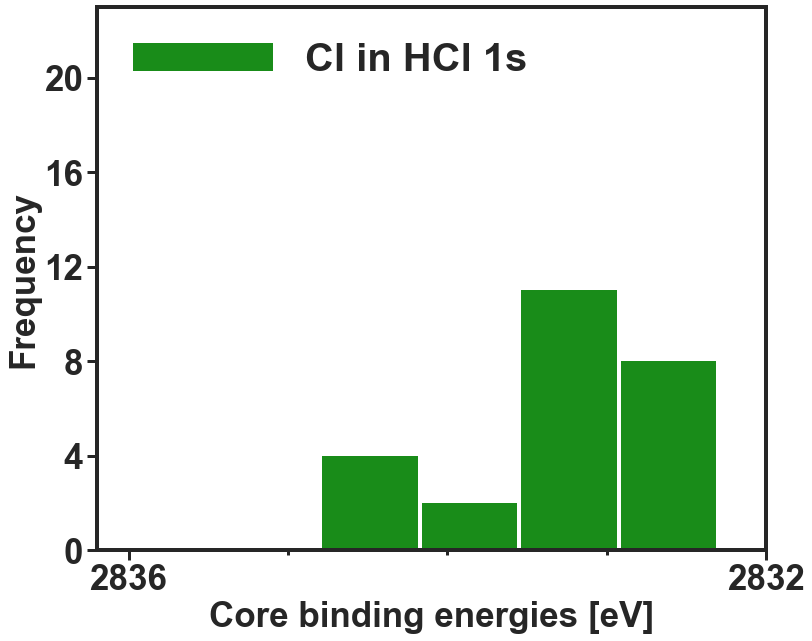

In [213]:
fig, ax = plt.subplots(figsize=(12,10))

x_hcl_acv3z_x2cmmf_gaunt_1s = df.z_Hchloride_1s_opt_fowat

y_hcl_acv3z_x2cmmf_gaunt_1s = [round(num, 1) for num in x_hcl_acv3z_x2cmmf_gaunt_1s]

z_hcl_acv3z_x2cmmf_gaunt_1s = np.array(y_hcl_acv3z_x2cmmf_gaunt_1s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_1s = count(z_hcl_acv3z_x2cmmf_gaunt_1s)
print(counted_hcl_acv3z_x2cmmf_gaunt_1s)



mean_z_hcl_acv3z_x2cmmf_gaunt_1s = np.mean(z_hcl_acv3z_x2cmmf_gaunt_1s)
print("mean_z =", mean_z_hcl_acv3z_x2cmmf_gaunt_1s)


std_z_hcl_acv3z_x2cmmf_gaunt_1s = np.std(z_hcl_acv3z_x2cmmf_gaunt_1s)
print("std_z =", std_z_hcl_acv3z_x2cmmf_gaunt_1s)






kwargs = dict(alpha=0.9, bins=4)

dk_hcl_acv3z_x2cmmf_gaunt_1s = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_1s))
dv_hcl_acv3z_x2cmmf_gaunt_1s = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_1s))


dkmin_z_hcl_acv3z_x2cmmf_gaunt_1s = min(dk_hcl_acv3z_x2cmmf_gaunt_1s)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_1s = max(dk_hcl_acv3z_x2cmmf_gaunt_1s)



dvmin_z_hcl_acv3z_x2cmmf_gaunt_1s = min(dv_hcl_acv3z_x2cmmf_gaunt_1s)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_1s = max(dv_hcl_acv3z_x2cmmf_gaunt_1s)


ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 30, 2))
#plt.xticks(np.arange(2833.8, 2834.55, 0.08))

plt.axis([2832, 2836.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(2832, 2836.2, 4))
plt.gca().invert_xaxis()

plt.hist(z_hcl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='green', rwidth=0.96, label='Cl in HCl 1s', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_1s , color='green', hist=False, kde_kws = {'color':'green', 'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 40}, handlelength=3.5)
#plt.figtext(0.2, 0.7, "$\mu=2823.1, \sigma=0.1$", fontsize=40, color="green")
plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_1s_opt_fowat.png', bbox_inches='tight', dpi=400)

plt.show()

{279.42: 1, 279.88: 1, 279.53: 1, 279.96: 2, 280.33: 1, 279.87: 1, 279.77: 1, 280.56: 1, 279.25: 2, 279.76: 2, 279.61: 1, 279.12: 1, 281.58: 1, 280.0: 1, 279.55: 1, 279.74: 1, 281.13: 1, 279.6: 1, 281.4: 1, 279.86: 1, 280.89: 1, 281.17: 1}
mean_z = 280.03799999999995
std_z = 0.6794644950253061


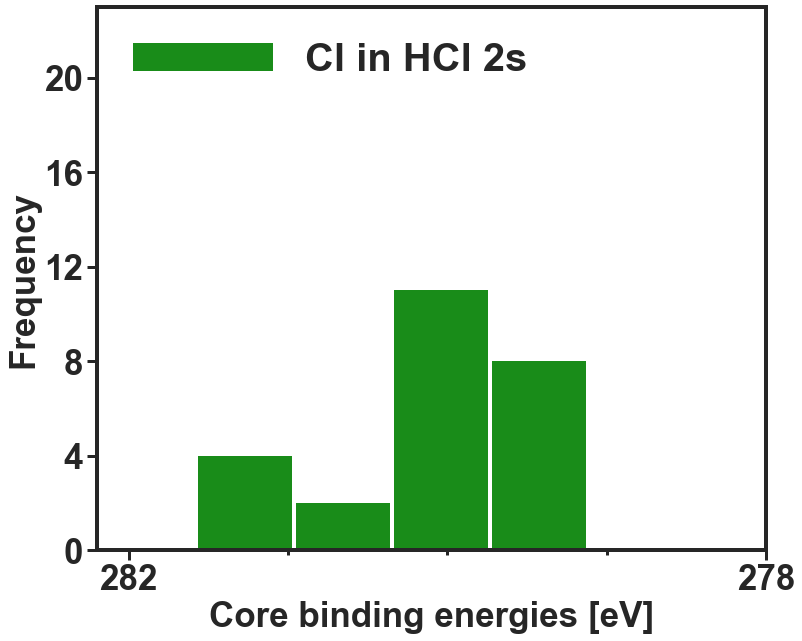

In [214]:
x_hcl_acv3z_x2cmmf_gaunt_2s = df.z_Hchloride_2s_opt_fowat

y_hcl_acv3z_x2cmmf_gaunt_2s = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2s]

z_hcl_acv3z_x2cmmf_gaunt_2s = np.array(y_hcl_acv3z_x2cmmf_gaunt_2s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2s = count(z_hcl_acv3z_x2cmmf_gaunt_2s)
print(counted_hcl_acv3z_x2cmmf_gaunt_2s)



mean_z_hcl_acv3z_x2cmmf_gaunt_2s = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2s)
print("mean_z =", mean_z_hcl_acv3z_x2cmmf_gaunt_2s)


std_z_hcl_acv3z_x2cmmf_gaunt_2s = np.std(z_hcl_acv3z_x2cmmf_gaunt_2s)
print("std_z =", std_z_hcl_acv3z_x2cmmf_gaunt_2s)



plt.figure(figsize=(12,10))



kwargs = dict(alpha=0.9, bins=4)

dk_hcl_acv3z_x2cmmf_gaunt_2s = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2s))
dv_hcl_acv3z_x2cmmf_gaunt_2s = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2s))


dkmin_z_hcl_acv3z_x2cmmf_gaunt_2s = min(dk_hcl_acv3z_x2cmmf_gaunt_2s)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2s = max(dk_hcl_acv3z_x2cmmf_gaunt_2s)



dvmin_z_hcl_acv3z_x2cmmf_gaunt_2s = min(dv_hcl_acv3z_x2cmmf_gaunt_2s)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2s = max(dv_hcl_acv3z_x2cmmf_gaunt_2s)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 13, 2))
#plt.xticks(np.arange(280.00, 282.04, 0.08))

plt.axis([278, 282.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(278, 282.2, 4))
plt.gca().invert_xaxis()

plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='green', rwidth=0.96, label='Cl in HCl 2s', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2s , color='red', hist=False, kde_kws = {'color':'green', 'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 40}, handlelength=3.5)
#plt.figtext(0.2, 0.7, "$\mu=280.8, \sigma=0.04$", fontsize=40, color="green")
plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_2s_opt_fowat.png', bbox_inches='tight', dpi=400)

plt.show()


{207.12: 1, 207.59: 1, 207.24: 1, 207.67: 2, 208.04: 1, 207.58: 1, 207.48: 1, 208.27: 1, 206.96: 1, 207.47: 2, 206.97: 1, 207.32: 1, 206.83: 1, 209.28: 1, 207.71: 1, 207.26: 1, 207.45: 1, 208.83: 1, 207.3: 1, 209.1: 1, 207.57: 1, 208.59: 1, 208.87: 1}
mean = 207.74560000000002
std = 0.6761128899821391
{208.75: 1, 209.22: 1, 208.87: 1, 209.3: 2, 209.67: 1, 209.21: 1, 209.11: 1, 209.9: 1, 208.59: 1, 209.1: 2, 208.6: 1, 208.95: 1, 208.46: 1, 210.91: 1, 209.34: 1, 208.89: 1, 209.08: 1, 210.46: 1, 208.93: 1, 210.73: 1, 209.2: 1, 210.22: 1, 210.5: 1}
mean = 209.37560000000002
std = 0.6761128899821379


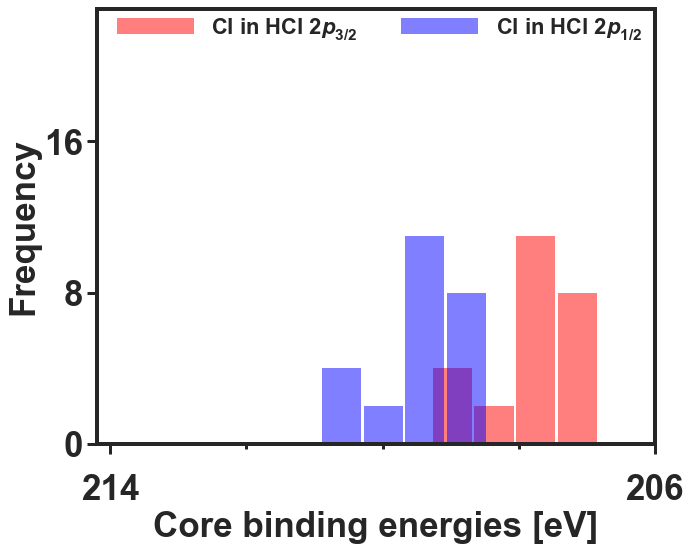

In [215]:
x_hcl_acv3z_x2cmmf_gaunt_2p32 = df.z_Hchloride_2p32_opt_fowat
x_hcl_acv3z_x2cmmf_gaunt_2p12 = df.z_Hchloride_2p12_opt_fowat

#spa_x_hcl_acv3z_x2cmmf_gaunt_2p12 = np.array(x_hcl_acv3z_x2cmmf_gaunt_2p12)


#x_hcl_acv3z_x2cmmf_gaunt_2p12 = [] 

#for i in spa_x_hcl_acv3z_x2cmmf_gaunt_2p12:
#    i-=1.44
#    x_hcl_acv3z_x2cmmf_gaunt_2p12.append(i)
#print("Adjust to plot spin-orbit graph=", x_hcl_acv3z_x2cmmf_gaunt_2p12)


y_hcl_acv3z_x2cmmf_gaunt_2p32 = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2p32]

z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.array(y_hcl_acv3z_x2cmmf_gaunt_2p32)



y_hcl_acv3z_x2cmmf_gaunt_2p12 = [round(num, 2) for num in x_hcl_acv3z_x2cmmf_gaunt_2p12]

z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.array(y_hcl_acv3z_x2cmmf_gaunt_2p12)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2p32 = count(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print(counted_hcl_acv3z_x2cmmf_gaunt_2p32)

mean_z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print("mean =", mean_z_hcl_acv3z_x2cmmf_gaunt_2p32)


std_z_hcl_acv3z_x2cmmf_gaunt_2p32 = np.std(z_hcl_acv3z_x2cmmf_gaunt_2p32)
print("std =", std_z_hcl_acv3z_x2cmmf_gaunt_2p32)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_hcl_acv3z_x2cmmf_gaunt_2p12 = count(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print(counted_hcl_acv3z_x2cmmf_gaunt_2p12)


mean_z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.mean(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print("mean =", mean_z_hcl_acv3z_x2cmmf_gaunt_2p12)


std_z_hcl_acv3z_x2cmmf_gaunt_2p12 = np.std(z_hcl_acv3z_x2cmmf_gaunt_2p12)
print("std =", std_z_hcl_acv3z_x2cmmf_gaunt_2p12)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.5, bins=4)

dk_hcl_acv3z_x2cmmf_gaunt_2p32 = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2p32))
dv_hcl_acv3z_x2cmmf_gaunt_2p32 = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2p32))


dk_hcl_acv3z_x2cmmf_gaunt_2p12 = list(dict.keys(counted_hcl_acv3z_x2cmmf_gaunt_2p12))
dv_hcl_acv3z_x2cmmf_gaunt_2p12 = list(dict.values(counted_hcl_acv3z_x2cmmf_gaunt_2p12))



dkmin_z_hcl_acv3z_x2cmmf_gaunt_2p32 = min(dk_hcl_acv3z_x2cmmf_gaunt_2p32)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2p32 = max(dk_hcl_acv3z_x2cmmf_gaunt_2p32)
dvmin_z_hcl_acv3z_x2cmmf_gaunt_2p32 = min(dv_hcl_acv3z_x2cmmf_gaunt_2p32)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2p32 = max(dv_hcl_acv3z_x2cmmf_gaunt_2p32)

dkmin_z_hcl_acv3z_x2cmmf_gaunt_2p12 = min(dk_hcl_acv3z_x2cmmf_gaunt_2p12)
dkmax_z_hcl_acv3z_x2cmmf_gaunt_2p12 = max(dk_hcl_acv3z_x2cmmf_gaunt_2p12)
dvmin_z_hcl_acv3z_x2cmmf_gaunt_2p12 = min(dv_hcl_acv3z_x2cmmf_gaunt_2p12)
dvmax_z_hcl_acv3z_x2cmmf_gaunt_2p12 = max(dv_hcl_acv3z_x2cmmf_gaunt_2p12)




plt.minorticks_on()
plt.tick_params(axis='y', which='major', length=10, width=3)
plt.tick_params(axis='x', which='major', length=10, width=3, pad=20)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([206, 214.2, 0, 23])
plt.yticks(np.arange(0, 23, 8))
plt.xticks(np.arange(206, 214.2, 8))
plt.gca().invert_xaxis()


plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='red', rwidth=0.94, label='Cl in HCl 2$p_{3/2}$', linewidth=0.2)
plt.hist(z_hcl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='blue', rwidth=0.94, label='Cl in HCl 2$p_{1/2}$', linewidth=0.2)
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2p32 , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':2, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_hcl_acv3z_x2cmmf_gaunt_2p12, color='blue', hist=False, kde_kws = {'color':'blue', 
#                      'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 22}, handlelength=3.5, ncol=2, bbox_to_anchor=(0,1.03))
#plt.figtext(0.2, 0.65, "$\mu=208.6, \sigma=0.04$", fontsize=25, color="red")
#plt.figtext(0.2, 0.6, "$\mu=210.2, \sigma=0.03$", fontsize=25, color="blue")
plt.savefig('zero_hcl_acv3z_x2cmmf_gaunt_2p1232_opt_fowat.png', bbox_inches='tight', dpi=400)
#plt.gca().axes.xaxis.set_ticklabels([])


plt.show()



In [216]:
df = pd.read_excel('Cl-_solvated_300K_data.xlsx', skiprows=7, sheet_name = 'Cl-_solvated_X2cmmf+gaunt')
df.head()

,Unnamed: 0,s_chloride_1s,Unnamed: 2,Unnamed: 3,s_chloride_2s,Unnamed: 5,s_chloride_2p12,Unnamed: 7,Unnamed: 8,s_chloride_2p32,s_chloride_2p
0,103.984735,2829.528631,2820.162631,10.150638,276.209008,7.554627,205.568955,7.494780,7.494840,203.941278,204.755117
1,103.982991,2829.481177,2820.115177,10.149715,276.183891,7.553633,205.541909,7.493764,7.493879,203.914376,204.728143
2,104.005955,2830.106050,2820.740050,10.173142,276.821364,7.577029,206.178533,7.517135,7.517305,204.551074,205.364803
3,103.986711,2829.582386,2820.216386,10.153184,276.278285,7.557126,205.636960,7.497233,7.497393,204.009381,204.823170
4,103.996717,2829.854677,2820.488677,10.163786,276.566769,7.567686,205.924316,7.507833,7.507922,204.296844,205.110580


{2829.5: 4, 2830.1: 9, 2829.6: 4, 2829.9: 4, 2829.8: 5, 2829.7: 4, 2830.0: 6, 2830.2: 2, 2829.1: 1, 2830.4: 2, 2830.3: 4, 2830.5: 3, 2829.3: 2}
mean_z = 2829.926
std_z = 0.3272980293249639


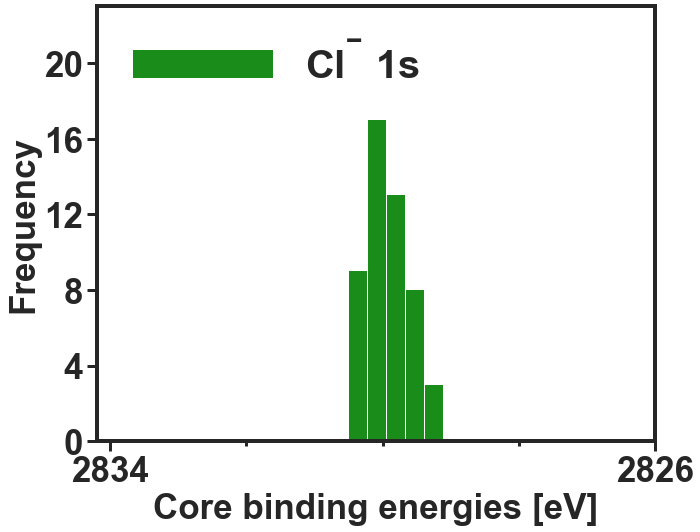

In [217]:
x_cl_acv3z_x2cmmf_gaunt_1s = df.s_chloride_1s
y_cl_acv3z_x2cmmf_gaunt_1s = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_1s]

z_cl_acv3z_x2cmmf_gaunt_1s = np.array(y_cl_acv3z_x2cmmf_gaunt_1s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_1s = count(z_cl_acv3z_x2cmmf_gaunt_1s)
print(counted_cl_acv3z_x2cmmf_gaunt_1s)



mean_z_cl_acv3z_x2cmmf_gaunt_1s = np.mean(z_cl_acv3z_x2cmmf_gaunt_1s)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_1s)


std_z_cl_acv3z_x2cmmf_gaunt_1s = np.std(z_cl_acv3z_x2cmmf_gaunt_1s)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_1s)


fig, ax = plt.subplots(figsize=(10,8))



kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_1s = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_1s))
dv_cl_acv3z_x2cmmf_gaunt_1s = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_1s))


dkmin_z_cl_acv3z_x2cmmf_gaunt_1s = min(dk_cl_acv3z_x2cmmf_gaunt_1s)
dkmax_z_cl_acv3z_x2cmmf_gaunt_1s = max(dk_cl_acv3z_x2cmmf_gaunt_1s)



dvmin_z_cl_acv3z_x2cmmf_gaunt_1s = min(dv_cl_acv3z_x2cmmf_gaunt_1s)
dvmax_z_cl_acv3z_x2cmmf_gaunt_1s = max(dv_cl_acv3z_x2cmmf_gaunt_1s)




ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)

#plt.yticks(np.arange(0, 20.2, 2))
#plt.xticks(np.arange(2829.1, 2830.6, 1))


plt.axis([2826, 2834.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(2826, 2834.2, 8))
plt.gca().invert_xaxis()


plt.hist(z_cl_acv3z_x2cmmf_gaunt_1s, **kwargs, color='green', rwidth=0.94, label='Cl$^{-}$ 1s', linewidth=0.1)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_1s , color='red', hist=False, kde_kws = {'color':'green', 'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 40}, handlelength=3.5)
#plt.figtext(0.2, 0.65, "$\mu=2820.1, \sigma=0.3$", fontsize=30, color="green")
plt.savefig('solvate_cl_acv3z_x2cmmf_gaunt_1s.png', bbox_inches='tight', dpi=400)

plt.show()


{276.2: 4, 276.8: 7, 276.3: 4, 276.6: 4, 276.5: 5, 276.4: 4, 276.7: 7, 276.9: 3, 275.8: 1, 277.1: 3, 277.0: 3, 277.2: 2, 276.0: 2, 277.3: 1}
mean_z = 276.63
std_z = 0.33421549934136985


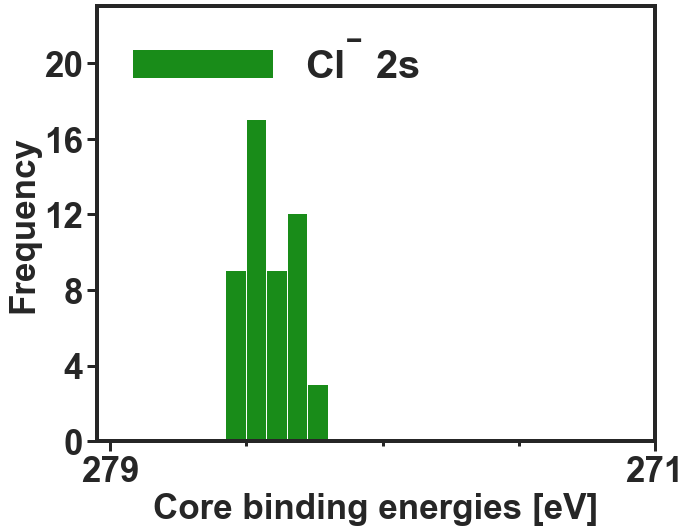

In [218]:
x_cl_acv3z_x2cmmf_gaunt_2s = df.s_chloride_2s

y_cl_acv3z_x2cmmf_gaunt_2s = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2s]

z_cl_acv3z_x2cmmf_gaunt_2s = np.array(y_cl_acv3z_x2cmmf_gaunt_2s)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2s = count(z_cl_acv3z_x2cmmf_gaunt_2s)
print(counted_cl_acv3z_x2cmmf_gaunt_2s)



mean_z_cl_acv3z_x2cmmf_gaunt_2s = np.mean(z_cl_acv3z_x2cmmf_gaunt_2s)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_2s)


std_z_cl_acv3z_x2cmmf_gaunt_2s = np.std(z_cl_acv3z_x2cmmf_gaunt_2s)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_2s)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_2s = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2s))
dv_cl_acv3z_x2cmmf_gaunt_2s = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2s))


dkmin_z_cl_acv3z_x2cmmf_gaunt_2s = min(dk_cl_acv3z_x2cmmf_gaunt_2s)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2s = max(dk_cl_acv3z_x2cmmf_gaunt_2s)



dvmin_z_cl_acv3z_x2cmmf_gaunt_2s = min(dv_cl_acv3z_x2cmmf_gaunt_2s)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2s = max(dv_cl_acv3z_x2cmmf_gaunt_2s)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 20.2, 2))
#plt.xticks(np.arange(275.8, 280.6, 1))

plt.axis([271, 279.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(271, 279.2, 8))
plt.gca().invert_xaxis()

plt.hist(z_cl_acv3z_x2cmmf_gaunt_2s, **kwargs, color='green', rwidth=0.96, label='Cl$^{-}$ 2s', linewidth=0.2)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2s , color='red', hist=False, kde_kws = {'color':'green', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 40}, handlelength=3.5)
#plt.figtext(0.2, 0.6, "$\mu=276.6, \sigma=0.3$", fontsize=30, color="green")
plt.savefig('solvate_cl_acv3z_x2cmmf_gaunt_2s.png', bbox_inches='tight', dpi=400)

plt.show()


{204.8: 6, 204.7: 2, 205.4: 8, 205.1: 4, 205.0: 5, 204.9: 2, 205.2: 5, 205.3: 6, 204.4: 1, 205.7: 4, 205.6: 2, 204.5: 1, 204.6: 1, 205.5: 2, 205.8: 1}
mean_z = 205.174
std_z = 0.3339520923725425


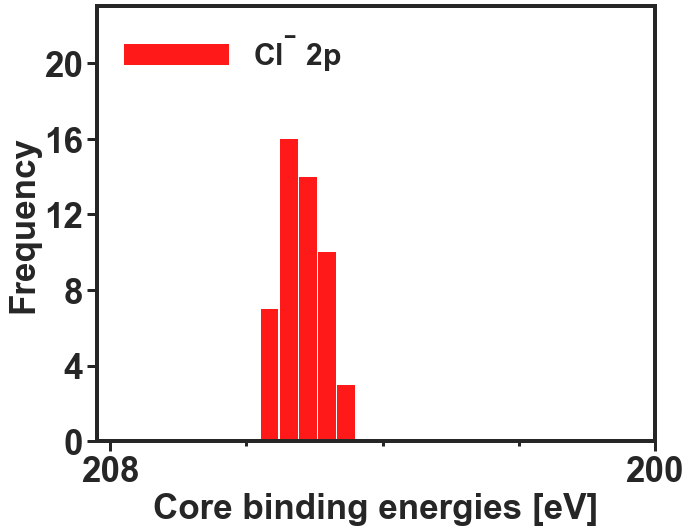

In [219]:
x_cl_acv3z_x2cmmf_gaunt_2p = df.s_chloride_2p

y_cl_acv3z_x2cmmf_gaunt_2p = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2p]

z_cl_acv3z_x2cmmf_gaunt_2p = np.array(y_cl_acv3z_x2cmmf_gaunt_2p)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p = count(z_cl_acv3z_x2cmmf_gaunt_2p)
print(counted_cl_acv3z_x2cmmf_gaunt_2p)



mean_z_cl_acv3z_x2cmmf_gaunt_2p = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p)
print("mean_z =", mean_z_cl_acv3z_x2cmmf_gaunt_2p)


std_z_cl_acv3z_x2cmmf_gaunt_2p = np.std(z_cl_acv3z_x2cmmf_gaunt_2p)
print("std_z =", std_z_cl_acv3z_x2cmmf_gaunt_2p)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.9, bins=5)

dk_cl_acv3z_x2cmmf_gaunt_2p = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p))
dv_cl_acv3z_x2cmmf_gaunt_2p = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p))


dkmin_z_cl_acv3z_x2cmmf_gaunt_2p = min(dk_cl_acv3z_x2cmmf_gaunt_2p)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p = max(dk_cl_acv3z_x2cmmf_gaunt_2p)



dvmin_z_cl_acv3z_x2cmmf_gaunt_2p = min(dv_cl_acv3z_x2cmmf_gaunt_2p)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p = max(dv_cl_acv3z_x2cmmf_gaunt_2p)



plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
#plt.yticks(np.arange(0, 20, 2))
#plt.xticks(np.arange(204.4, 206.2, 1))

plt.axis([200, 208.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(200, 208.2, 8))
plt.gca().invert_xaxis()


plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p, **kwargs, color='red', rwidth=0.94, label='Cl$^{-}$ 2p', linewidth=0.2)
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p , color='red', hist=False, kde_kws = {'color':'red', 
#                      'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=3.5)
#plt.figtext(0.2, 0.7, "$\mu=205.2, \sigma=0.3$", fontsize=30, color="red")
#plt.savefig('solvate_cl_acv3z_x2cmmf_gaunt_2p.png', bbox_inches='tight', dpi=400)

plt.show()


{203.94: 1, 203.91: 1, 204.55: 2, 204.01: 2, 204.3: 1, 204.26: 1, 204.22: 1, 204.03: 1, 203.97: 1, 204.23: 2, 204.57: 2, 204.11: 1, 204.42: 3, 204.6: 1, 204.47: 3, 204.53: 1, 203.55: 1, 204.87: 1, 204.52: 1, 204.37: 1, 204.16: 1, 204.75: 1, 204.14: 1, 204.9: 1, 204.48: 1, 204.63: 1, 204.93: 1, 204.59: 1, 204.35: 1, 204.13: 1, 204.88: 1, 203.99: 1, 203.73: 1, 204.28: 1, 203.77: 1, 204.54: 1, 204.7: 1, 204.69: 1, 204.79: 1, 204.98: 1, 203.93: 1, 204.25: 1}
mean = 204.3632
std = 0.3311159313593949
{205.6: 6, 205.5: 1, 206.2: 9, 205.9: 6, 205.8: 4, 205.7: 2, 206.1: 5, 205.2: 1, 206.5: 3, 206.0: 4, 206.4: 2, 206.3: 3, 206.6: 2, 205.4: 2}
mean = 205.996
std = 0.32982419559516823


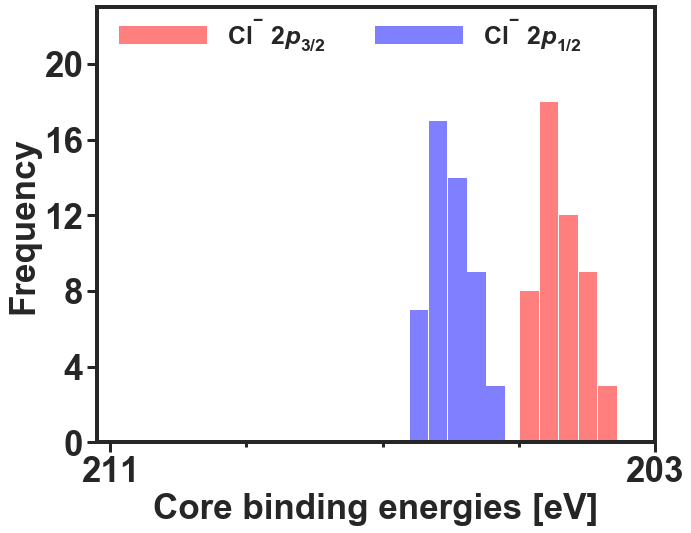

In [220]:
x_cl_acv3z_x2cmmf_gaunt_2p32 = df.s_chloride_2p32
x_cl_acv3z_x2cmmf_gaunt_2p12 = df.s_chloride_2p12



y_cl_acv3z_x2cmmf_gaunt_2p32 = [round(num, 2) for num in x_cl_acv3z_x2cmmf_gaunt_2p32]

z_cl_acv3z_x2cmmf_gaunt_2p32 = np.array(y_cl_acv3z_x2cmmf_gaunt_2p32)



y_cl_acv3z_x2cmmf_gaunt_2p12 = [round(num, 1) for num in x_cl_acv3z_x2cmmf_gaunt_2p12]

z_cl_acv3z_x2cmmf_gaunt_2p12 = np.array(y_cl_acv3z_x2cmmf_gaunt_2p12)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p32 = count(z_cl_acv3z_x2cmmf_gaunt_2p32)
print(counted_cl_acv3z_x2cmmf_gaunt_2p32)

mean_z_cl_acv3z_x2cmmf_gaunt_2p32 = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p32)
print("mean =", mean_z_cl_acv3z_x2cmmf_gaunt_2p32)


std_z_cl_acv3z_x2cmmf_gaunt_2p32 = np.std(z_cl_acv3z_x2cmmf_gaunt_2p32)
print("std =", std_z_cl_acv3z_x2cmmf_gaunt_2p32)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_cl_acv3z_x2cmmf_gaunt_2p12 = count(z_cl_acv3z_x2cmmf_gaunt_2p12)
print(counted_cl_acv3z_x2cmmf_gaunt_2p12)


mean_z_cl_acv3z_x2cmmf_gaunt_2p12 = np.mean(z_cl_acv3z_x2cmmf_gaunt_2p12)
print("mean =", mean_z_cl_acv3z_x2cmmf_gaunt_2p12)


std_z_cl_acv3z_x2cmmf_gaunt_2p12 = np.std(z_cl_acv3z_x2cmmf_gaunt_2p12)
print("std =", std_z_cl_acv3z_x2cmmf_gaunt_2p12)



plt.figure(figsize=(10,8))

kwargs = dict(alpha=0.5, bins=5, linewidth=0.2)

dk_cl_acv3z_x2cmmf_gaunt_2p32 = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p32))
dv_cl_acv3z_x2cmmf_gaunt_2p32 = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p32))


dk_cl_acv3z_x2cmmf_gaunt_2p12 = list(dict.keys(counted_cl_acv3z_x2cmmf_gaunt_2p12))
dv_cl_acv3z_x2cmmf_gaunt_2p12 = list(dict.values(counted_cl_acv3z_x2cmmf_gaunt_2p12))



dkmin_z_cl_acv3z_x2cmmf_gaunt_2p32 = min(dk_cl_acv3z_x2cmmf_gaunt_2p32)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p32 = max(dk_cl_acv3z_x2cmmf_gaunt_2p32)
dvmin_z_cl_acv3z_x2cmmf_gaunt_2p32 = min(dv_cl_acv3z_x2cmmf_gaunt_2p32)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p32 = max(dv_cl_acv3z_x2cmmf_gaunt_2p32)

dkmin_z_cl_acv3z_x2cmmf_gaunt_2p12 = min(dk_cl_acv3z_x2cmmf_gaunt_2p12)
dkmax_z_cl_acv3z_x2cmmf_gaunt_2p12 = max(dk_cl_acv3z_x2cmmf_gaunt_2p12)
dvmin_z_cl_acv3z_x2cmmf_gaunt_2p12 = min(dv_cl_acv3z_x2cmmf_gaunt_2p12)
dvmax_z_cl_acv3z_x2cmmf_gaunt_2p12 = max(dv_cl_acv3z_x2cmmf_gaunt_2p12)




plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)



plt.axis([203, 211.2, 0, 23])
plt.yticks(np.arange(0, 23, 4))
plt.xticks(np.arange(203, 211.2, 8))
plt.gca().invert_xaxis()



plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p32, **kwargs, color='red', rwidth=0.96, label='Cl$^{-}$ 2$p_{3/2}$')
plt.hist(z_cl_acv3z_x2cmmf_gaunt_2p12, **kwargs, color='blue', rwidth=0.96, label='Cl$^{-}$ 2$p_{1/2}$')
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p32 , color='green', hist=False, kde_kws = {'color':'green', 
#                      'linewidth':5, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_cl_acv3z_x2cmmf_gaunt_2p12, color='gold', hist=False, kde_kws = {'color':'gold', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.xlabel('Core binding energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Frequency', fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 25}, handlelength=3.5, ncol=2, bbox_to_anchor=(0,1.03))
#plt.figtext(0.5, 0.77, "$\mu=204.4, \sigma=0.3$", fontsize=20, color="red")
#plt.figtext(0.15, 0.77, "$\mu=206.0, \sigma=0.3$", fontsize=20, color="blue")
plt.savefig('solvate_cl_acv3z_x2cmmf_gaunt_2p1232.png', bbox_inches='tight', dpi=400)

plt.show()



In [221]:
df = pd.read_excel('Cl_ice210k_droplet_300k.xlsx', skiprows=3, sheet_name = 'ice210k_liquid300k')
df.head()

snapshot = df.snapshot
chloride_210_1s = df.chloride_210_1s
chloride_210_1s_avg = df.chloride_210_1s_avg
chloride_210_2s = df.chloride_210_2s
chloride_210_2s_avg = df.chloride_210_2s_avg
chloride_210_2p = df.chloride_210_2p
chloride_210_2p_avg = df.chloride_210_2p_avg


chloride_300_1s = df.chloride_300_1s
chloride_300_1s_avg = df.chloride_300_1s_avg
chloride_300_2s = df.chloride_300_2s
chloride_300_2s_avg = df.chloride_300_2s_avg
chloride_300_2p = df.chloride_300_2p
chloride_300_2p_avg = df.chloride_300_2p_avg


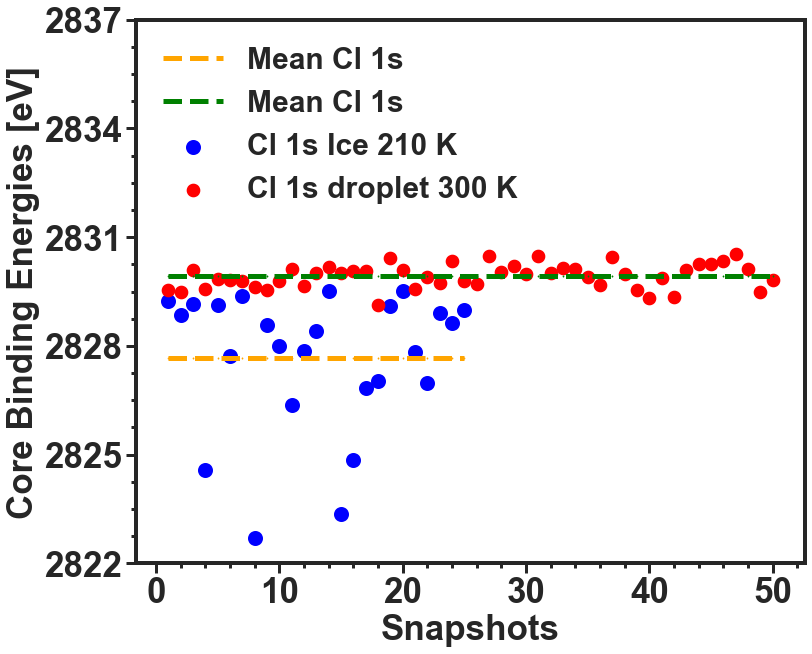

In [222]:
fig, ax = plt.subplots(figsize=(12,10))



plt.scatter(snapshot, chloride_210_1s, color="blue", s=100, label='Cl 1s Ice 210 K', linewidth=5)
plt.scatter(snapshot, chloride_300_1s, color="red", s=75, label='Cl 1s droplet 300 K', linewidth=5)


plt.plot(snapshot, chloride_210_1s_avg, color="orange", marker='d', markersize=1, linestyle='--', label='Mean Cl 1s', linewidth=5)
plt.plot(snapshot, chloride_300_1s_avg, color="green", marker='d', markersize=1, linestyle='--', label='Mean Cl 1s ', linewidth=5)



ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=2)
#plt.axis([1, 1.58, 2812.00, 2824.7])
plt.yticks(np.arange(2822.00, 2837.7, 3))
plt.xlabel('Snapshots', fontsize=35, fontweight='bold')
plt.ylabel('Core Binding Energies [eV]', fontsize=35, fontweight='bold')
plt.savefig('temp_1s', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


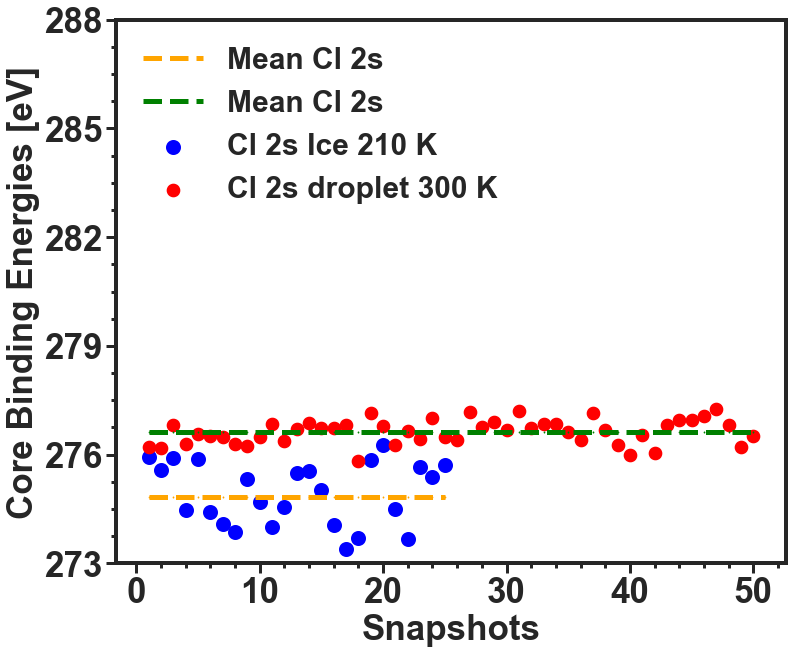

In [223]:
fig, ax = plt.subplots(figsize=(12,10))



plt.scatter(snapshot, chloride_210_2s, color="blue", s=100, label='Cl 2s Ice 210 K', linewidth=5)
plt.scatter(snapshot, chloride_300_2s, color="red", s=75, label='Cl 2s droplet 300 K', linewidth=5)


plt.plot(snapshot, chloride_210_2s_avg, color="orange", marker='d', markersize=1, linestyle='--', label='Mean Cl 2s ', linewidth=5)
plt.plot(snapshot, chloride_300_2s_avg, color="green", marker='d', markersize=1, linestyle='--', label='Mean Cl 2s ', linewidth=5)



ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=2)
#plt.axis([1, 1.58, 2812.00, 2824.7])
plt.yticks(np.arange(273.00, 288.2, 3))
plt.xlabel('Snapshots', fontsize=35, fontweight='bold')
plt.ylabel('Core Binding Energies [eV]', fontsize=35, fontweight='bold')
plt.savefig('temp_2s', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


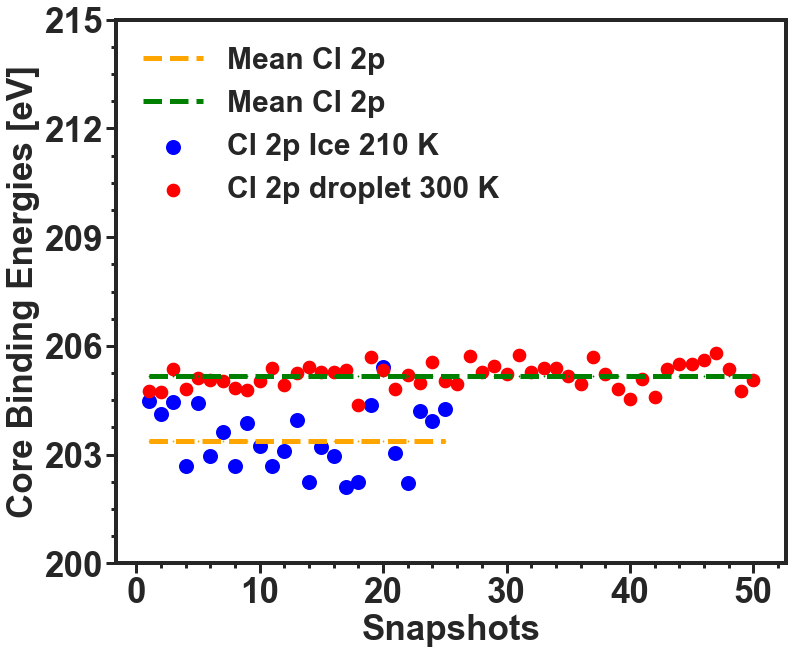

In [224]:
fig, ax = plt.subplots(figsize=(12,10))



plt.scatter(snapshot, chloride_210_2p, color="blue", s=100, label='Cl 2p Ice 210 K', linewidth=5)
plt.scatter(snapshot, chloride_300_2p, color="red", s=75, label='Cl 2p droplet 300 K', linewidth=5)




plt.plot(snapshot, chloride_210_2p_avg, color="orange", marker='d', markersize=1, linestyle='--', label='Mean Cl 2p ', linewidth=5)
plt.plot(snapshot, chloride_300_2p_avg, color="green", marker='d', markersize=1, linestyle='--', label='Mean Cl 2p ', linewidth=5)




ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 30}, handlelength=2)
#plt.axis([1, 1.58, 2812.00, 2824.7])
plt.yticks(np.arange(200.00, 215.2, 3))
plt.xlabel('Snapshots', fontsize=35, fontweight='bold')
plt.ylabel('Core Binding Energies [eV]', fontsize=35, fontweight='bold')
plt.savefig('temp_2p', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


In [225]:
df = pd.read_excel('hcl_bondlen.xlsx', skiprows=3, sheet_name = 'HCl_PES')
df.head()


bond_lengths = df.bond_lengths
HCl_1s = df.HCl_1s
HCl_2s = df.HCl_2s
HCl_2p12 = df.HCl_2p12
HCl_2p32 = df.HCl_2p32
HCl_2p = df.HCl_2p
pes = df.pes




In [226]:
df = pd.read_excel('hcl_bondlen.xlsx', skiprows=3, sheet_name = 'HCl_PES')
df.head()


HCl_1s_sansG = df.HCl_1s_sansG
HCl_2s_sansG = df.HCl_2s_sansG
HCl_2p12_sansG = df.HCl_2p12_sansG
HCl_2p32_sansG = df.HCl_2p32_sansG
HCl_2p_sansG = df.HCl_2p_sansG
pes_sansG = df.pes_sansG

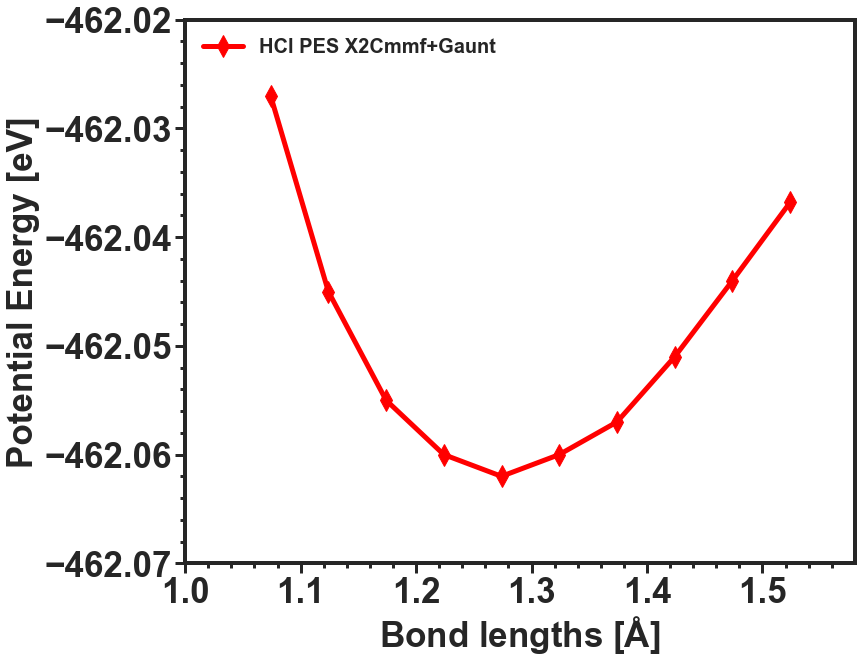

In [227]:
fig, ax = plt.subplots(figsize=(12,10))



#plt.plot(bond_lengths, pes, color="blue", marker='d', markersize=15, linestyle='solid', label='HCl PES X2Cmmf', linewidth=5)
plt.plot(bond_lengths, pes, color="red", marker='d', markersize=15, linestyle='solid', label='HCl PES X2Cmmf+Gaunt', linewidth=5)

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=2)
plt.axis([1., 1.58, -462.07, -462.020])
#plt.yticks(np.arange(-462.20, -462.02, -0.01))
#plt.xticks(np.arange(1, 1.58, 0.05))
plt.xlabel('Bond lengths [$\mathrm{\AA}$]', fontsize=35, fontweight='bold')
plt.ylabel('Potential Energy [eV]', fontsize=35, fontweight='bold')
plt.savefig('HCl_pes_check', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


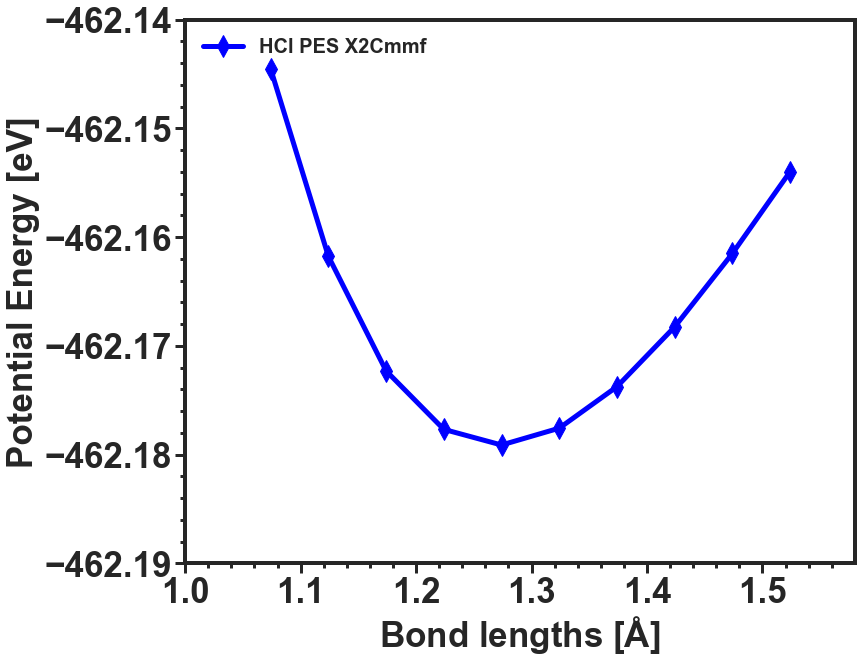

In [228]:
fig, ax = plt.subplots(figsize=(12,10))




plt.plot(bond_lengths, pes_sansG, color="blue", marker='d', markersize=15, linestyle='solid', label='HCl PES X2Cmmf', linewidth=5)

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=2)
plt.axis([1., 1.58, -462.19, -462.14])
#plt.yticks(np.arange(-462.20, -462.02, -0.01))
#plt.xticks(np.arange(1, 1.58, 0.05))
plt.xlabel('Bond lengths [$\mathrm{\AA}$]', fontsize=35, fontweight='bold')
plt.ylabel('Potential Energy [eV]', fontsize=35, fontweight='bold')
plt.savefig('HCl_pes_check_sg', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


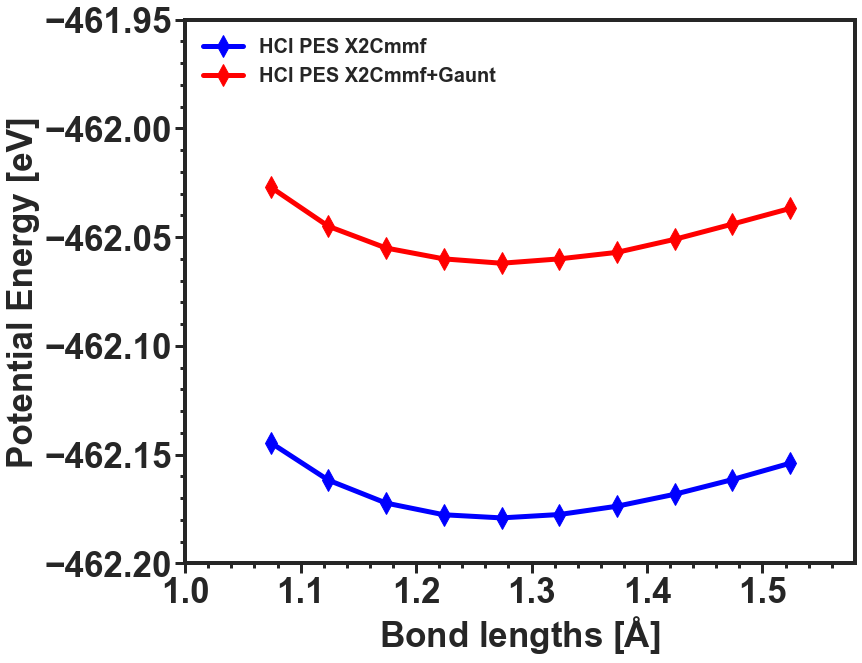

In [229]:
fig, ax = plt.subplots(figsize=(12,10))



plt.plot(bond_lengths, pes_sansG, color="blue", marker='d', markersize=15, linestyle='solid', label='HCl PES X2Cmmf', linewidth=5)
plt.plot(bond_lengths, pes, color="red", marker='d', markersize=15, linestyle='solid', label='HCl PES X2Cmmf+Gaunt', linewidth=5)

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=2)
plt.axis([1., 1.58, -462.20, -461.950])
#plt.yticks(np.arange(-462.20, -462.02, -0.01))
#plt.xticks(np.arange(1, 1.58, 0.05))
plt.xlabel('Bond lengths [$\mathrm{\AA}$]', fontsize=35, fontweight='bold')
plt.ylabel('Potential Energy [eV]', fontsize=35, fontweight='bold')
#plt.savefig('HCl_pes', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


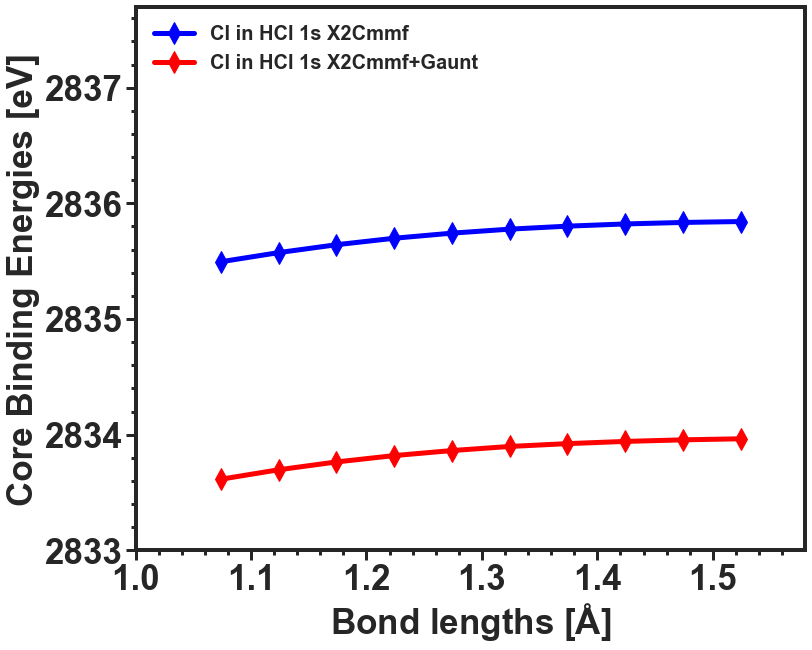

In [230]:
fig, ax = plt.subplots(figsize=(12,10))

plt.plot(bond_lengths, HCl_1s_sansG, color="blue", marker='d', markersize=15, linestyle='solid', label='Cl in HCl 1s X2Cmmf', linewidth=5)
plt.plot(bond_lengths, HCl_1s, color="red", marker='d', markersize=15, linestyle='solid', label='Cl in HCl 1s X2Cmmf+Gaunt', linewidth=5)

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=2)
plt.axis([1, 1.58, 2833.00, 2837.7])
plt.yticks(np.arange(2833.00, 2837.7, 1))
#plt.axis([1, 1.58, 2833.60, 2834.01])
#plt.yticks(np.arange(2833.60, 2834.01, 0.1))
#plt.xticks(np.arange(1, 1.58, 0.05))
plt.xlabel('Bond lengths [$\mathrm{\AA}$]', fontsize=35, fontweight='bold')
plt.ylabel('Core Binding Energies [eV]', fontsize=35, fontweight='bold')
plt.savefig('HCl_bbe_1s', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

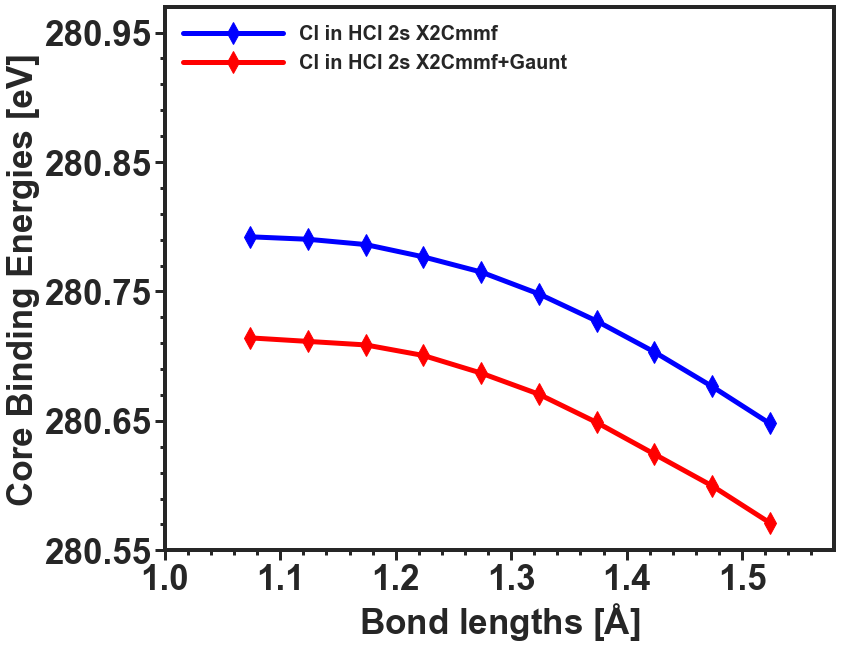

In [231]:
fig, ax = plt.subplots(figsize=(12,10))

plt.plot(bond_lengths, HCl_2s_sansG, color="blue", marker='d', markersize=15, linestyle='solid', label='Cl in HCl 2s X2Cmmf', linewidth=5)
plt.plot(bond_lengths, HCl_2s, color="red", marker='d', markersize=15, linestyle='solid', label='Cl in HCl 2s X2Cmmf+Gaunt', linewidth=5)

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=5)
plt.axis([1, 1.58, 280.55, 280.97])
plt.yticks(np.arange(280.55, 280.97, 0.1))
#plt.axis([1, 1.58, 280.56, 280.77])
#plt.yticks(np.arange(280.56, 280.77, 0.1))
#plt.xticks(np.arange(1, 1.58, 0.05))
plt.xlabel('Bond lengths [$\mathrm{\AA}$]', fontsize=35, fontweight='bold')
plt.ylabel('Core Binding Energies [eV]', fontsize=35, fontweight='bold')
#plt.savefig('HCl_bbe_2s', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

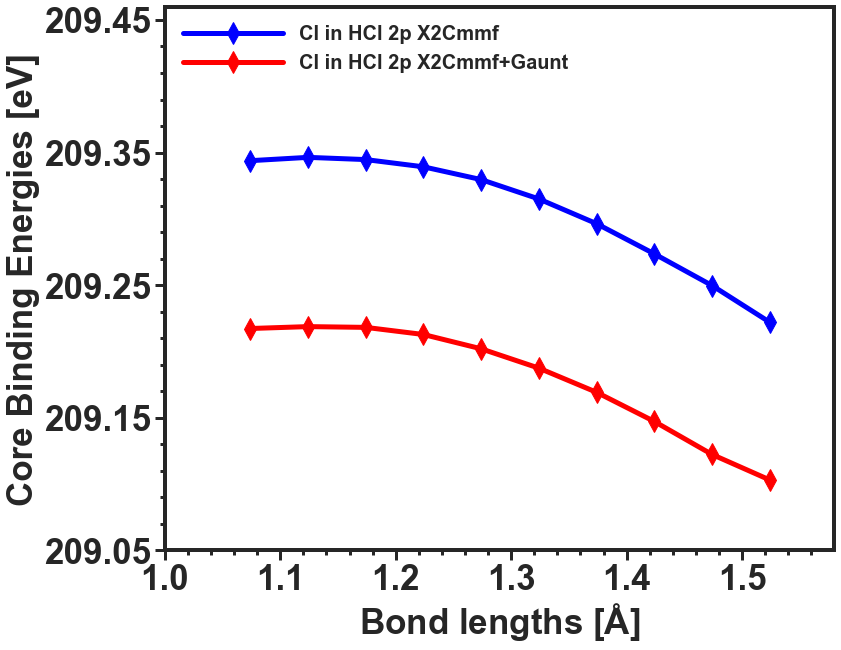

In [232]:
fig, ax = plt.subplots(figsize=(12,10))

plt.plot(bond_lengths, HCl_2p_sansG, color="blue", marker='d', markersize=15, linestyle='solid', label='Cl in HCl 2p X2Cmmf', linewidth=5)
plt.plot(bond_lengths, HCl_2p, color="red", marker='d', markersize=15, linestyle='solid', label='Cl in HCl 2p X2Cmmf+Gaunt', linewidth=5)

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=5)
plt.axis([1, 1.58, 209.05, 209.46])
plt.yticks(np.arange(209.05, 209.46, 0.1))
#plt.axis([1, 1.58, 209.08, 209.29])
#plt.yticks(np.arange(209.08, 209.29, 0.1))
#plt.xticks(np.arange(1, 1.58, 0.05))
plt.xlabel('Bond lengths [$\mathrm{\AA}$]', fontsize=35, fontweight='bold')
plt.ylabel('Core Binding Energies [eV]', fontsize=35, fontweight='bold')
plt.savefig('HCl_bbe_2p', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [233]:
df = pd.read_excel('atoms_in_water_and_hcl_vs_binding_energies.xlsx', skiprows=3, sheet_name = 'HCl')
df.head()


HCl_2p_be_rigid = df.HCl_2p_be_rigid
HCl_H_Cl_bondl_rigid = df.HCl_H_Cl_bondl_rigid
HCl_HCl_1H2O_rigid = df.HCl_HCl_1H2O_rigid
HCl_Cl_H1_rigid = df.HCl_Cl_H1_rigid
HCl_Cl_H2_rigid = df.HCl_Cl_H2_rigid
HCl_H_O_rigid = df.HCl_H_O_rigid
HCl_Cl_O_rigid = df.HCl_Cl_O_rigid


HCl_2p_be_opt = df.HCl_2p_be_opt
HCl_H_Cl_bondl_opt = df.HCl_H_Cl_bondl_opt
HCl_HCl_1H2O_opt = df.HCl_HCl_1H2O_opt
HCl_Cl_H1_opt = df.HCl_Cl_H1_opt
HCl_Cl_H2_opt = df.HCl_Cl_H2_opt
HCl_H_O_opt = df.HCl_H_O_opt
HCl_Cl_O_opt = df.HCl_Cl_O_opt


HCl_2p_be_opt_quat = df.HCl_2p_be_opt_quat
HCl_H_Cl_bondl_opt_quat = df.HCl_H_Cl_bondl_opt_quat
HCl_HCl_1H2O_opt_quat = df.HCl_HCl_1H2O_opt_quat
HCl_Cl_H1_opt_quat = df.HCl_Cl_H1_opt_quat
HCl_Cl_H2_opt_quat = df.HCl_Cl_H2_opt_quat
HCl_H_O_opt_quat = df.HCl_H_O_opt_quat
HCl_Cl_O_opt_quat = df.HCl_Cl_O_opt_quat


Cl_2p_be_opt = df.Cl_2p_be_opt
Cl_Cl_1H2O_opt = df.Cl_Cl_1H2O_opt
Cl_Cl_H1_opt = df.Cl_Cl_H1_opt
Cl_Cl_H2_opt = df.Cl_Cl_H2_opt
Cl_Cl_O_opt = df.Cl_Cl_O_opt



In [234]:
#Rigid Configuration

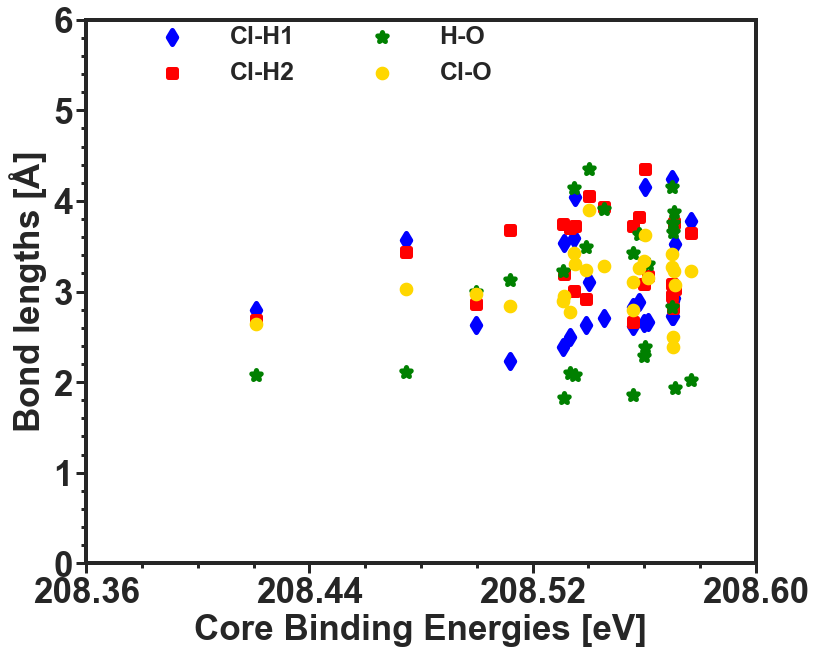

In [235]:
fig, ax = plt.subplots(figsize=(12,10))



plt.scatter(HCl_2p_be_rigid, HCl_Cl_H1_rigid, color="blue", marker='d', s=100, label='Cl-H1', linewidth=5)
plt.scatter(HCl_2p_be_rigid, HCl_Cl_H2_rigid, color="red",  marker='s', s=75, label='Cl-H2', linewidth=5)
plt.scatter(HCl_2p_be_rigid, HCl_H_O_rigid, color="green",  marker='*', s=100, label='H-O', linewidth=5)
plt.scatter(HCl_2p_be_rigid, HCl_Cl_O_rigid, color="gold", s=75, label='Cl-O', linewidth=5)

#plt.bar(HCl_2p_be_rigid, HCl_HCl_1H2O_rigid, color = 'brown', width = 0.0002, label='HCl-H$_{2}$O', linewidth=5)

#plt.scatter(HCl_2p_be_rigid, HCl_HCl_1H2O_rigid, color = 'black', marker='x', s=50, label='HCl-H$_{2}$O', linewidth=5)

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=1, prop={'size': 25}, handlelength=3.0, ncol=2, bbox_to_anchor=(0.64,1.03))
#plt.axis([1, 1.58, 2812.00, 2824.7])
plt.yticks(np.arange(0, 7, 1))
plt.xticks(np.arange(208.36, 208.63, 0.08))
#plt.xticks(np.arange(206.5, 209.6, 1))
plt.xlabel('Core Binding Energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Bond lengths [$\mathrm{\AA}$]', fontsize=35, fontweight='bold')
plt.savefig('Rigid_be_atoms_bondl', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


In [236]:
#Opt HCl Configuration

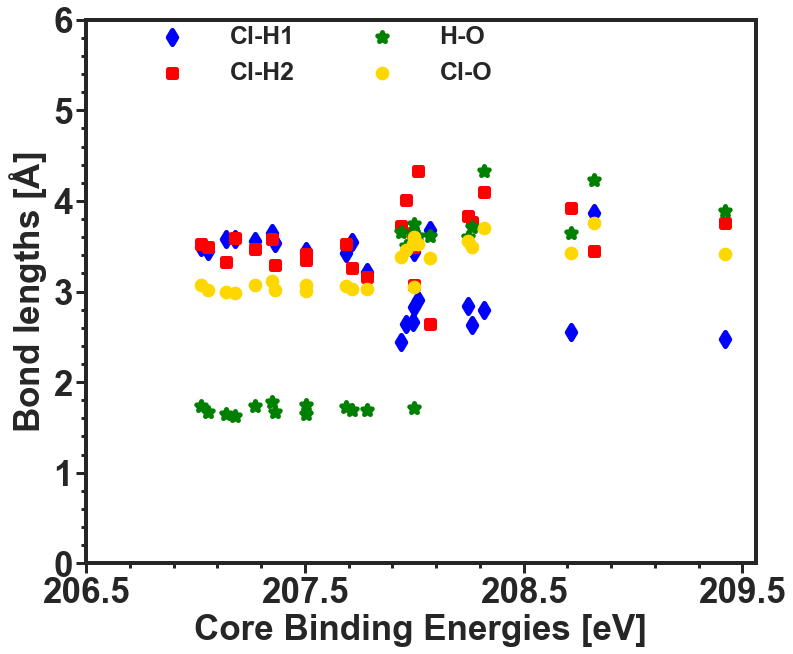

In [237]:
fig, ax = plt.subplots(figsize=(12,10))



plt.scatter(HCl_2p_be_opt, HCl_Cl_H1_opt, color="blue", marker='d', s=100, label='Cl-H1', linewidth=5)
plt.scatter(HCl_2p_be_opt, HCl_Cl_H2_opt, color="red",  marker='s', s=75, label='Cl-H2', linewidth=5)
plt.scatter(HCl_2p_be_opt, HCl_H_O_opt, color="green",  marker='*', s=100, label='H-O', linewidth=5)
plt.scatter(HCl_2p_be_opt, HCl_Cl_O_opt, color="gold", s=75, label='Cl-O', linewidth=5)

#plt.bar(HCl_2p_be_opt, HCl_HCl_1H2O_opt, color = 'brown', width = 0.009, label='HCl-H$_{2}$O', linewidth=5)

#plt.scatter(HCl_2p_be_opt, HCl_HCl_1H2O_opt, color = 'black', marker='x', s=50, label='HCl-H$_{2}$O', linewidth=5)




ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=1, prop={'size': 25}, handlelength=3.0, ncol=2, bbox_to_anchor=(0.64,1.03))
#plt.axis([1, 1.58, 2812.00, 2824.7])
plt.yticks(np.arange(0, 7, 1))
plt.xticks(np.arange(206.5, 209.6, 1))
plt.xlabel('Core Binding Energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Bond lengths [$\mathrm{\AA}$]', fontsize=35, fontweight='bold')
plt.savefig('opt_be_atoms_bondl', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


In [238]:
#Opt HCl 4 water Configuration

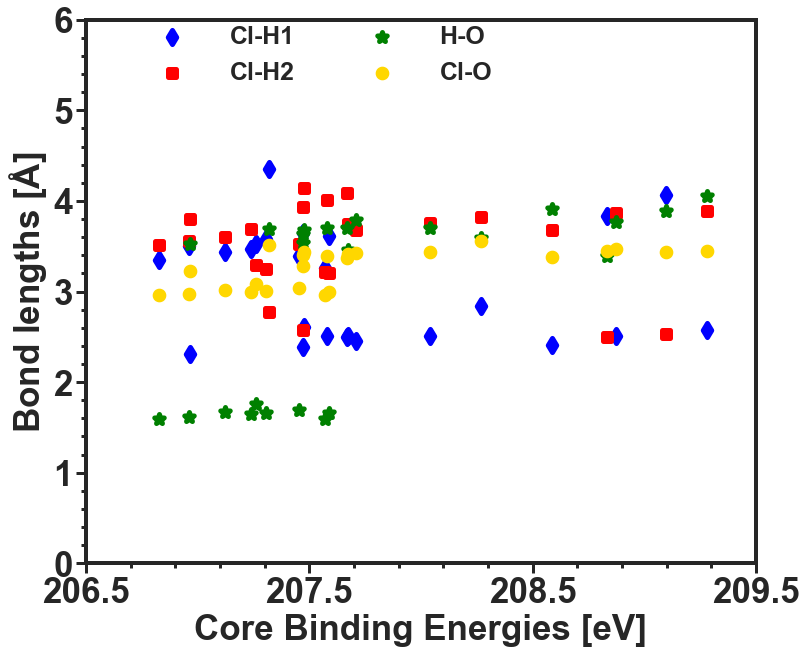

In [239]:
fig, ax = plt.subplots(figsize=(12,10))



plt.scatter(HCl_2p_be_opt_quat, HCl_Cl_H1_opt_quat, color="blue", marker='d', s=100, label='Cl-H1', linewidth=5)
plt.scatter(HCl_2p_be_opt_quat, HCl_Cl_H2_opt_quat, color="red",  marker='s', s=75, label='Cl-H2', linewidth=5)
plt.scatter(HCl_2p_be_opt_quat, HCl_H_O_opt_quat, color="green",  marker='*', s=100, label='H-O', linewidth=5)
plt.scatter(HCl_2p_be_opt_quat, HCl_Cl_O_opt_quat, color="gold", s=75, label='Cl-O', linewidth=5)

#plt.bar(HCl_2p_be_opt_quat, HCl_HCl_1H2O_opt_quat, color = 'brown', width = 0.009, label='HCl-H$_{2}$O', linewidth=5)

#plt.scatter(HCl_2p_be_opt_quat, HCl_HCl_1H2O_opt_quat, color = 'black', marker='x', s=50, label='HCl-H$_{2}$O', linewidth=5)






ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=1, prop={'size': 25}, handlelength=3.0, ncol=2, bbox_to_anchor=(0.64,1.03))
#plt.axis([1, 1.58, 2812.00, 2824.7])
plt.yticks(np.arange(0, 7, 1))
plt.xticks(np.arange(206.5, 209.6, 1))
plt.xlabel('Core Binding Energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Bond lengths [$\mathrm{\AA}$]', fontsize=35, fontweight='bold')
plt.savefig('quat_opt_be_atoms_bondl', bbox_inches='tight', dpi=400)
plt.show()
plt.close()


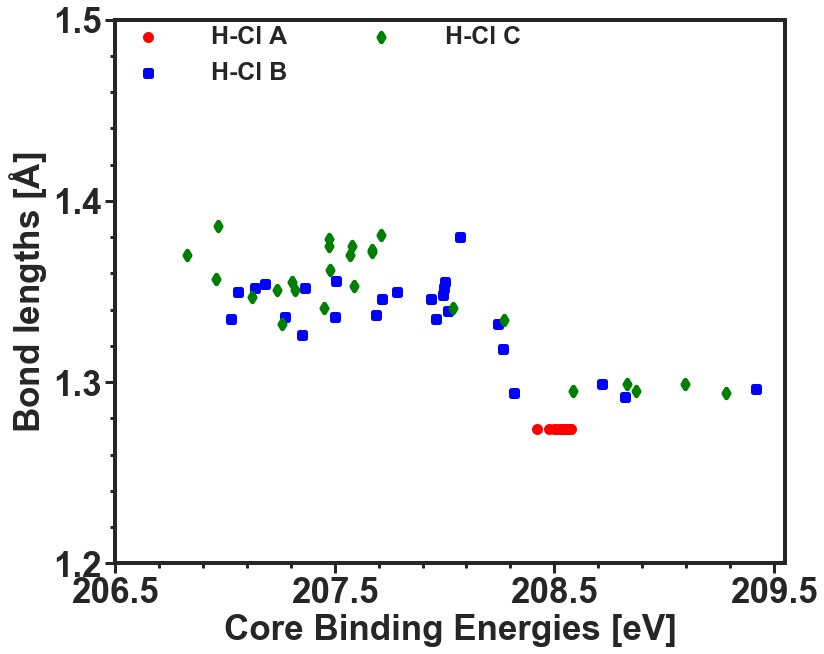

In [240]:
fig, ax = plt.subplots(figsize=(12,10))



#plt.scatter(HCl_2p_be_rigid, HCl_H_Cl_bondl_rigid, color="blue", marker='d', s=100, label='H-HCl', linewidth=5)

plt.scatter(HCl_2p_be_rigid, HCl_H_Cl_bondl_rigid, color = 'red', marker='o', label='H-Cl A', linewidth=5)
plt.scatter(HCl_2p_be_opt, HCl_H_Cl_bondl_opt, color = 'blue', marker='s', label='H-Cl B', linewidth=5)
plt.scatter(HCl_2p_be_opt_quat, HCl_H_Cl_bondl_opt_quat, color = 'green', marker='d', label='H-Cl C', linewidth=5)




ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='both', which='minor', length=5, width=3)

plt.xticks(fontsize=35, fontweight='bold')
plt.yticks(fontsize=35, fontweight='bold')
plt.legend(loc=1, prop={'size': 25}, handlelength=3.5, ncol=2, bbox_to_anchor=(0.64,1.03))
#plt.axis([1, 1.58, 2812.00, 2824.7])
plt.yticks(np.arange(1.2, 1.51, 0.1))
plt.xticks(np.arange(206.5, 209.7, 1))
plt.xlabel('Core Binding Energies [eV]', fontsize=35, fontweight='bold')
plt.ylabel('Bond lengths [$\mathrm{\AA}$]', fontsize=35, fontweight='bold')
plt.savefig('Rigid_be_hcl_bondl', bbox_inches='tight', dpi=400)
plt.show()
plt.close()
